# Strom – Masterthesis Code for Data import, cleaning and analysis

In [ ]:
#import packages needed
import pandas as pd
import numpy as np
import oscces
import sidetable
import pycountry

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## import extensions from VIEWS
from ingester3.scratch import cache_manager
cache_manager()
from ingester3.extensions import *

import viewser
from viewser import Queryset, Column
from views_transformation_library import utilities

import ingester3
from ingester3.Country import Country

In [ ]:
##set a working directory
user = os.path.expanduser('~')
user

os.makedirs(f'{user}/Desktop/', exist_ok=True) 

path = os.chdir(f'{user}/Desktop/'+'private/thesis')

## 1. Data import Dependent Variable – DALY attributable to unsafe access to WASH

In [2]:
#import the csv files into one dataframe
file_list = os.listdir(path)
file_list
file= pd.concat(map(pd.read_csv, ['IHME-GBD_2019_DATA-820325b5-1.csv']))
df = file.copy()
display(df.head())

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,rei_id,rei_name,metric_id,metric_name,year,val,upper,lower
0,2,DALYs (Disability-Adjusted Life Years),170,Congo,3,Both,22,All ages,956,Respiratory infections and tuberculosis,82,"Unsafe water, sanitation, and handwashing",3,Rate,1990,1094.230977,1838.052066,505.145782
1,2,DALYs (Disability-Adjusted Life Years),170,Congo,3,Both,22,All ages,956,Respiratory infections and tuberculosis,238,No access to handwashing facility,3,Rate,1990,1094.230977,1838.052066,505.145782
2,2,DALYs (Disability-Adjusted Life Years),182,Malawi,3,Both,22,All ages,956,Respiratory infections and tuberculosis,82,"Unsafe water, sanitation, and handwashing",3,Rate,1990,2577.721592,4112.196439,1112.851738
3,2,DALYs (Disability-Adjusted Life Years),182,Malawi,3,Both,22,All ages,956,Respiratory infections and tuberculosis,238,No access to handwashing facility,3,Rate,1990,2577.721592,4112.196439,1112.851738
4,2,DALYs (Disability-Adjusted Life Years),182,Malawi,3,Both,22,All ages,957,Enteric infections,82,"Unsafe water, sanitation, and handwashing",3,Rate,1990,17485.375252,22842.570838,12345.249184


In [3]:
list(df.location_name.unique())

['Congo',
 'Malawi',
 'Madagascar',
 'Equatorial Guinea',
 'Angola',
 'Comoros',
 'Ethiopia',
 'Eritrea',
 'Botswana',
 'Burundi',
 'Central African Republic',
 'Niger',
 'Djibouti',
 'Chad',
 'Mauritania',
 'Cabo Verde',
 'Mozambique',
 'Zambia',
 "Côte d'Ivoire",
 'Gabon',
 'Eswatini',
 'Zimbabwe',
 'Benin',
 'Democratic Republic of the Congo',
 'Somalia',
 'Lesotho',
 'Namibia',
 'Sao Tome and Principe',
 'South Sudan',
 'South Africa',
 'Uganda',
 'Kenya',
 'Nigeria',
 'Mali',
 'Sudan',
 'Liberia',
 'Togo',
 'United Republic of Tanzania',
 'Gambia',
 'Rwanda',
 'Guinea',
 'Ghana',
 'Cameroon',
 'Burkina Faso',
 'Senegal',
 'Sierra Leone',
 'Guinea-Bissau']

In [4]:
# =============================================================================
## 2. GET DESCRIPTIVES OF DATASET
# =============================================================================
print(df.dtypes)
print(df.columns)
print(df.describe(include='all'))

## sanity check to ensure the spread of the data is correct
print('sanity check 1, ensure appropriate years and countries are represented')
list_country=list(list(df['location_name'].drop_duplicates()))
print('country list', list_country)
#inspect for NAs
print('following checks for completeness of all columns')
print('is country_id null', df['location_id'].isnull().values.any())
print('is risk_id null', df['rei_id'].isnull().values.any())
print('is risk_name null', df['rei_name'].isnull().values.any())
print('is year null', df['year'].isnull().values.any())
print('is sex null', df['sex_id'].isnull().values.any())
print('is age_group null', df['age_id'].isnull().values.any())
print('is daly_mean null', df['val'].isnull().values.any())
print('these age groups have been pulled', df['age_name'].unique())
print('these sex groups have been pulled', df['sex_name'].unique())
print('these years have been pulled', df['year'].unique())
print('these risks have been pulled', df['rei_name'].unique())

# =============================================================================
# ## 3. FILTER, RENAME AND CLEAN
# =============================================================================
#filter only the wanted columns
df = df.loc[df['metric_id'].isin([3])]
df_filtered = df.filter(['measure_name', 'location_name','location_id',
                         'sex_name', 'age_name', 'rei_id', 'cause_name',
                         'cause_id','rei_name', 'year', 'val', 'upper',
                         'lower'])
#change dtypes if neccessary
df_filtered['val'] = df_filtered['val'].astype(int)
df_filtered['upper'] = df_filtered['upper'].astype(int)
df_filtered['lower'] = df_filtered['lower'].astype(int)

#rename columns
df_filtered = df_filtered.rename(columns={'location_name': 'country',
                                          'sex_name': 'sex',
                                          'age_name':'age',
                                          'val': 'daly_mean',
                                          'upper': 'daly_upper',
                                          'lower': 'daly_lower'})

measure_id         int64
measure_name      object
location_id        int64
location_name     object
sex_id             int64
sex_name          object
age_id             int64
age_name          object
cause_id           int64
cause_name        object
rei_id             int64
rei_name          object
metric_id          int64
metric_name       object
year               int64
val              float64
upper            float64
lower            float64
dtype: object
Index(['measure_id', 'measure_name', 'location_id', 'location_name', 'sex_id',
       'sex_name', 'age_id', 'age_name', 'cause_id', 'cause_name', 'rei_id',
       'rei_name', 'metric_id', 'metric_name', 'year', 'val', 'upper',
       'lower'],
      dtype='object')
        measure_id                            measure_name   location_id  \
count      28200.0                                   28200  28200.000000   
unique         NaN                                       1           NaN   
top            NaN  DALYs (Disability-Adju

In [5]:
df_filtered.location_id.unique()

array([170, 182, 181, 172, 168, 176, 179, 178, 193, 175, 169, 213, 177,
       204, 212, 203, 184, 191, 205, 173, 197, 198, 200, 171, 187, 194,
       195, 215, 435, 196, 190, 180, 214, 211, 522, 210, 218, 189, 206,
       185, 208, 207, 202, 201, 216, 217, 209])

In [6]:
#fix gender naming
#fix naming of the gender values
df_filtered = df_filtered.replace({'Both': 'btsx','Male':'mle','Female':'fmle'})

In [7]:
#only filter our level 3 WASH risk factors
df_WASH =df_filtered.copy()

In [8]:
df_WASH

,measure_name,country,location_id,sex,age,rei_id,cause_name,cause_id,rei_name,year,daly_mean,daly_upper,daly_lower
0,DALYs (Disability-Adjusted Life Years),Congo,170,btsx,All ages,82,Respiratory infections and tuberculosis,956,"Unsafe water, sanitation, and handwashing",1990,1094,1838,505
1,DALYs (Disability-Adjusted Life Years),Congo,170,btsx,All ages,238,Respiratory infections and tuberculosis,956,No access to handwashing facility,1990,1094,1838,505
2,DALYs (Disability-Adjusted Life Years),Malawi,182,btsx,All ages,82,Respiratory infections and tuberculosis,956,"Unsafe water, sanitation, and handwashing",1990,2577,4112,1112
3,DALYs (Disability-Adjusted Life Years),Malawi,182,btsx,All ages,238,Respiratory infections and tuberculosis,956,No access to handwashing facility,1990,2577,4112,1112
4,DALYs (Disability-Adjusted Life Years),Malawi,182,btsx,All ages,82,Enteric infections,957,"Unsafe water, sanitation, and handwashing",1990,17485,22842,12345
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28195,DALYs (Disability-Adjusted Life Years),Sao Tome and Principe,215,btsx,All ages,83,"Communicable, maternal, neonatal, and nutritio...",295,Unsafe water source,2019,356,509,224
28196,DALYs (Disability-Adjusted Life Years),Sao Tome and Principe,215,btsx,All ages,84,"Communicable, maternal, neonatal, and nutritio...",295,Unsafe sanitation,2019,203,280,140
28197,DALYs (Disability-Adjusted Life Years),Sao Tome and Principe,215,btsx,All ages,238,"Communicable, maternal, neonatal, and nutritio...",295,No access to handwashing facility,2019,438,645,256
28198,DALYs (Disability-Adjusted Life Years),Sao Tome and Principe,215,btsx,All ages,82,Lower respiratory infections,322,"Unsafe water, sanitation, and handwashing",2019,319,511,139


In [9]:
print(df_WASH.rei_id.unique())
print(df_WASH.rei_name.unique())
df_WASH = df_WASH.loc[df_WASH['rei_id'].isin([238,83,84])]
print(df_WASH)

[ 82 238  83  84]
['Unsafe water, sanitation, and handwashing'
 'No access to handwashing facility' 'Unsafe water source'
 'Unsafe sanitation']
                                 measure_name                country  \
1      DALYs (Disability-Adjusted Life Years)                  Congo   
3      DALYs (Disability-Adjusted Life Years)                 Malawi   
5      DALYs (Disability-Adjusted Life Years)                 Malawi   
6      DALYs (Disability-Adjusted Life Years)                 Malawi   
7      DALYs (Disability-Adjusted Life Years)                 Malawi   
...                                       ...                    ...   
28193  DALYs (Disability-Adjusted Life Years)  Sao Tome and Principe   
28195  DALYs (Disability-Adjusted Life Years)  Sao Tome and Principe   
28196  DALYs (Disability-Adjusted Life Years)  Sao Tome and Principe   
28197  DALYs (Disability-Adjusted Life Years)  Sao Tome and Principe   
28199  DALYs (Disability-Adjusted Life Years)  Sao Tome and Prin

In [10]:
#get iso3 codes for countries

def findCountryAlpha3 (country_name):
    """Producing current iso alpha 3 codes from standardized country names"""
    try:
        return pycountry.countries.get(name=country_name).alpha_3
    except:
        return ('')

In [17]:
##create iso
df_WASH['iso'] = df_WASH.apply(lambda row: findCountryAlpha3(row.country), axis=1)

/var/folders/3l/pgxm2f9j3bbgbjcj2pyxl__00000gp/T/ipykernel_2958/2553773447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_WASH['iso'] = df_WASH.apply(lambda row: findCountryAlpha3(row.country), axis=1)


In [18]:
df_WASH

,measure_name,country,location_id,sex,age,rei_id,cause_name,cause_id,rei_name,year,daly_mean,daly_upper,daly_lower,iso
1,DALYs (Disability-Adjusted Life Years),Congo,170,btsx,All ages,238,Respiratory infections and tuberculosis,956,No access to handwashing facility,1990,1094,1838,505,COG
3,DALYs (Disability-Adjusted Life Years),Malawi,182,btsx,All ages,238,Respiratory infections and tuberculosis,956,No access to handwashing facility,1990,2577,4112,1112,MWI
5,DALYs (Disability-Adjusted Life Years),Malawi,182,btsx,All ages,83,Enteric infections,957,Unsafe water source,1990,15669,20898,10629,MWI
6,DALYs (Disability-Adjusted Life Years),Malawi,182,btsx,All ages,84,Enteric infections,957,Unsafe sanitation,1990,11806,15408,8333,MWI
7,DALYs (Disability-Adjusted Life Years),Malawi,182,btsx,All ages,238,Enteric infections,957,No access to handwashing facility,1990,5867,8069,3898,MWI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28193,DALYs (Disability-Adjusted Life Years),Sao Tome and Principe,215,btsx,All ages,238,All causes,294,No access to handwashing facility,2019,438,645,256,STP
28195,DALYs (Disability-Adjusted Life Years),Sao Tome and Principe,215,btsx,All ages,83,"Communicable, maternal, neonatal, and nutritio...",295,Unsafe water source,2019,356,509,224,STP
28196,DALYs (Disability-Adjusted Life Years),Sao Tome and Principe,215,btsx,All ages,84,"Communicable, maternal, neonatal, and nutritio...",295,Unsafe sanitation,2019,203,280,140,STP
28197,DALYs (Disability-Adjusted Life Years),Sao Tome and Principe,215,btsx,All ages,238,"Communicable, maternal, neonatal, and nutritio...",295,No access to handwashing facility,2019,438,645,256,STP


In [19]:
##check the uniqueness and coverage of the iso codes
inspect = df_WASH[df_WASH['iso'].isna()]
print(inspect['iso'].unique())

[]


In [20]:
list_iso = list(df_WASH.iso)
list_iso = list( dict.fromkeys(list_iso) )
print(list_iso)

['COG', 'MWI', 'MDG', 'GNQ', 'AGO', 'COM', 'ETH', 'ERI', 'BWA', 'BDI', 'CAF', 'NER', 'DJI', 'TCD', 'MRT', 'CPV', 'MOZ', 'ZMB', 'CIV', 'GAB', 'SWZ', 'ZWE', 'BEN', '', 'SOM', 'LSO', 'NAM', 'STP', 'SSD', 'ZAF', 'UGA', 'KEN', 'NGA', 'MLI', 'SDN', 'LBR', 'TGO', 'GMB', 'RWA', 'GIN', 'GHA', 'CMR', 'BFA', 'SEN', 'SLE', 'GNB']


In [15]:
df_WASH

,measure_name,country,location_id,sex,age,rei_id,cause_name,cause_id,rei_name,year,daly_mean,daly_upper,daly_lower,iso
1,DALYs (Disability-Adjusted Life Years),Congo,170,btsx,All ages,238,Respiratory infections and tuberculosis,956,No access to handwashing facility,1990,1094,1838,505,COG
3,DALYs (Disability-Adjusted Life Years),Malawi,182,btsx,All ages,238,Respiratory infections and tuberculosis,956,No access to handwashing facility,1990,2577,4112,1112,MWI
5,DALYs (Disability-Adjusted Life Years),Malawi,182,btsx,All ages,83,Enteric infections,957,Unsafe water source,1990,15669,20898,10629,MWI
6,DALYs (Disability-Adjusted Life Years),Malawi,182,btsx,All ages,84,Enteric infections,957,Unsafe sanitation,1990,11806,15408,8333,MWI
7,DALYs (Disability-Adjusted Life Years),Malawi,182,btsx,All ages,238,Enteric infections,957,No access to handwashing facility,1990,5867,8069,3898,MWI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28193,DALYs (Disability-Adjusted Life Years),Sao Tome and Principe,215,btsx,All ages,238,All causes,294,No access to handwashing facility,2019,438,645,256,STP
28195,DALYs (Disability-Adjusted Life Years),Sao Tome and Principe,215,btsx,All ages,83,"Communicable, maternal, neonatal, and nutritio...",295,Unsafe water source,2019,356,509,224,STP
28196,DALYs (Disability-Adjusted Life Years),Sao Tome and Principe,215,btsx,All ages,84,"Communicable, maternal, neonatal, and nutritio...",295,Unsafe sanitation,2019,203,280,140,STP
28197,DALYs (Disability-Adjusted Life Years),Sao Tome and Principe,215,btsx,All ages,238,"Communicable, maternal, neonatal, and nutritio...",295,No access to handwashing facility,2019,438,645,256,STP


In [22]:
##set iso manually for countries that were missed
df_WASH.loc[df_WASH['country'] == 'United Republic of Tanzania', 'iso'] = 'TZA'
df_WASH.loc[df_WASH['country'] == 'Democratic Republic of the Congo', 'iso'] = 'COD'

In [23]:
df_WASH

,measure_name,country,location_id,sex,age,rei_id,cause_name,cause_id,rei_name,year,daly_mean,daly_upper,daly_lower,iso
1,DALYs (Disability-Adjusted Life Years),Congo,170,btsx,All ages,238,Respiratory infections and tuberculosis,956,No access to handwashing facility,1990,1094,1838,505,COG
3,DALYs (Disability-Adjusted Life Years),Malawi,182,btsx,All ages,238,Respiratory infections and tuberculosis,956,No access to handwashing facility,1990,2577,4112,1112,MWI
5,DALYs (Disability-Adjusted Life Years),Malawi,182,btsx,All ages,83,Enteric infections,957,Unsafe water source,1990,15669,20898,10629,MWI
6,DALYs (Disability-Adjusted Life Years),Malawi,182,btsx,All ages,84,Enteric infections,957,Unsafe sanitation,1990,11806,15408,8333,MWI
7,DALYs (Disability-Adjusted Life Years),Malawi,182,btsx,All ages,238,Enteric infections,957,No access to handwashing facility,1990,5867,8069,3898,MWI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28193,DALYs (Disability-Adjusted Life Years),Sao Tome and Principe,215,btsx,All ages,238,All causes,294,No access to handwashing facility,2019,438,645,256,STP
28195,DALYs (Disability-Adjusted Life Years),Sao Tome and Principe,215,btsx,All ages,83,"Communicable, maternal, neonatal, and nutritio...",295,Unsafe water source,2019,356,509,224,STP
28196,DALYs (Disability-Adjusted Life Years),Sao Tome and Principe,215,btsx,All ages,84,"Communicable, maternal, neonatal, and nutritio...",295,Unsafe sanitation,2019,203,280,140,STP
28197,DALYs (Disability-Adjusted Life Years),Sao Tome and Principe,215,btsx,All ages,238,"Communicable, maternal, neonatal, and nutritio...",295,No access to handwashing facility,2019,438,645,256,STP


In [27]:
df_WASH.query('location_id == 171')

,measure_name,country,location_id,sex,age,rei_id,cause_name,cause_id,rei_name,year,daly_mean,daly_upper,daly_lower,iso
144,DALYs (Disability-Adjusted Life Years),Democratic Republic of the Congo,171,btsx,All ages,83,Diarrheal diseases,302,Unsafe water source,1990,6136,8764,4128,COD
145,DALYs (Disability-Adjusted Life Years),Democratic Republic of the Congo,171,btsx,All ages,84,Diarrheal diseases,302,Unsafe sanitation,1990,4565,6368,3209,COD
146,DALYs (Disability-Adjusted Life Years),Democratic Republic of the Congo,171,btsx,All ages,238,Diarrheal diseases,302,No access to handwashing facility,1990,2358,3345,1591,COD
192,DALYs (Disability-Adjusted Life Years),Democratic Republic of the Congo,171,btsx,All ages,238,Lower respiratory infections,322,No access to handwashing facility,1990,2503,3979,1176,COD
279,DALYs (Disability-Adjusted Life Years),Democratic Republic of the Congo,171,btsx,All ages,238,Respiratory infections and tuberculosis,956,No access to handwashing facility,1991,2449,3873,1165,COD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27946,DALYs (Disability-Adjusted Life Years),Democratic Republic of the Congo,171,btsx,All ages,83,Diarrheal diseases,302,Unsafe water source,2019,2326,4305,1021,COD
27947,DALYs (Disability-Adjusted Life Years),Democratic Republic of the Congo,171,btsx,All ages,84,Diarrheal diseases,302,Unsafe sanitation,2019,1648,3039,739,COD
27948,DALYs (Disability-Adjusted Life Years),Democratic Republic of the Congo,171,btsx,All ages,238,Diarrheal diseases,302,No access to handwashing facility,2019,899,1687,389,COD
28061,DALYs (Disability-Adjusted Life Years),Democratic Republic of the Congo,171,btsx,All ages,238,Lower respiratory infections,322,No access to handwashing facility,2019,570,943,259,COD


In [32]:
list(df_WASH.iso.unique())
df_WASH.head()
df_WASH.columns

Index(['measure_name', 'country', 'location_id', 'sex', 'age', 'rei_id',
       'cause_name', 'cause_id', 'rei_name', 'year', 'daly_mean', 'daly_upper',
       'daly_lower', 'iso'],
      dtype='object')

In [24]:
df_WASH.iso.unique()

array(['COG', 'MWI', 'MDG', 'GNQ', 'AGO', 'COM', 'ETH', 'ERI', 'BWA',
       'BDI', 'CAF', 'NER', 'DJI', 'TCD', 'MRT', 'CPV', 'MOZ', 'ZMB',
       'CIV', 'GAB', 'SWZ', 'ZWE', 'BEN', 'COD', 'SOM', 'LSO', 'NAM',
       'STP', 'SSD', 'ZAF', 'UGA', 'KEN', 'NGA', 'MLI', 'SDN', 'LBR',
       'TGO', 'TZA', 'GMB', 'RWA', 'GIN', 'GHA', 'CMR', 'BFA', 'SEN',
       'SLE', 'GNB'], dtype=object)

In [28]:
#safe data to csv as back up
os.getcwd()
df_WASH.to_csv('df_DALY_SSA.csv')

## 2. Data import Independent Variable – Conflict Fatalities

get the data for the neighboring country binary conflict variable

In [3]:
# Show a list of available transforms
!viewser transforms list


  > Transforms
  ---------------------------------------------------------
  | name           | path                               |
  |:---------------|:-----------------------------------|
  | rename         | any/util.rename                    |
  | ln             | any/ops.ln                         |
  | gte            | any/bool.gte                       |
  | lte            | any/bool.lte                       |
  | in_range       | any/bool.in_range                  |
  | delta          | any/temporal.delta                 |
  | tlag           | any/temporal.tlag                  |
  | tlead          | any/temporal.tlead                 |
  | moving_average | any/temporal.moving_average        |
  | moving_sum     | any/temporal.moving_sum            |
  | cweq           | any/temporal.cweq                  |
  | time_since     | any/temporal.time_since            |
  | decay          | any/temporal.decay                 |
  | onset_possible | any/temporal.onset_possible      

In [4]:
!viewser tables show ged2_cm    


  > Ged2_cm
  -------------------------------------------------------
  | name                    | path                    |
  |:------------------------|:------------------------|
  | country_month_id        | country_month_id        |
  | ged_sb_best_sum_nokgi   | ged_sb_best_sum_nokgi   |
  | ged_ns_best_sum_nokgi   | ged_ns_best_sum_nokgi   |
  | ged_os_best_sum_nokgi   | ged_os_best_sum_nokgi   |
  | ged_sb_best_count_nokgi | ged_sb_best_count_nokgi |
  | ged_ns_best_count_nokgi | ged_ns_best_count_nokgi |
  | ged_os_best_count_nokgi | ged_os_best_count_nokgi |
  | ged_sb_high_sum_nokgi   | ged_sb_high_sum_nokgi   |
  | ged_ns_high_sum_nokgi   | ged_ns_high_sum_nokgi   |
  | ged_os_high_sum_nokgi   | ged_os_high_sum_nokgi   |
  | ged_sb_high_count_nokgi | ged_sb_high_count_nokgi |
  | ged_ns_high_count_nokgi | ged_ns_high_count_nokgi |
  | ged_os_high_count_nokgi | ged_os_high_count_nokgi |
  | test                    | test                    |
  
  ----------------------------

In [5]:
#get the ged with countrylags to indicate conflict in neighbouring countries
data_conflict = (Queryset("ged2_cm", "country_month")
                 .with_column(Column("ged_best_sb", from_table="ged2_cm", from_column="ged_sb_best_count_nokgi")
                 .transform.spatial.countrylag(1,1,0,0))
                 .with_column(Column("ged_best_ns", from_table="ged2_cm", from_column="ged_ns_best_count_nokgi")
                 .transform.spatial.countrylag(1,1,0,0))
                 .with_column(Column("ged_best_os", from_table="ged2_cm", from_column="ged_os_best_count_nokgi")
                 .transform.spatial.countrylag(1,1,0,0)))


data_conflict = data_conflict.publish().fetch()

data_conflict

 .    

ged_best_sb  ged_best_ns  ged_best_os
month_id country_id                                       
1        1                   NaN          NaN          NaN
         2                   NaN          NaN          NaN
         3                   0.0          0.0          0.0
         4                   NaN          NaN          NaN
         5                   0.0          0.0          0.0
...                          ...          ...          ...
852      242                 0.0          0.0          0.0
         243                 0.0          0.0          0.0
         244                 0.0          0.0          0.0
         245                 0.0          0.0          0.0
         246                 0.0          0.0          0.0

[158230 rows x 3 columns]

In [6]:
#check for the distribution of 0 and 1
data_conflict.describe()

,ged_best_sb,ged_best_ns,ged_best_os
count,132662.000000,132662.000000,132662.000000
mean,8.833208,1.434985,1.883983
std,61.924916,11.656813,9.481348
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,2017.000000,414.000000,1107.000000


In [8]:
#rename
data_conflict = data_conflict.rename(columns={'ged_best_sb':'best_sb_neighbor','ged_best_ns':'best_ns_neighbor','ged_best_os':'best_os_neighbor'})

In [9]:
#safe the data
data_conflict.to_csv('data_neighbor_conflict.csv')

now import the data for the fatality estimates

In [11]:
data = pd.read_csv('GEDEvent_v22_1.csv')

/var/folders/3l/pgxm2f9j3bbgbjcj2pyxl__00000gp/T/ipykernel_2339/2663555733.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('GEDEvent_v22_1.csv')


In [12]:
df = data.copy()

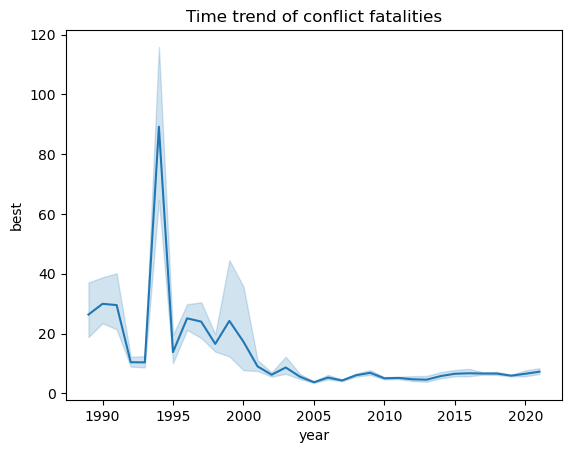

In [13]:
sns.lineplot(x='year',y='best',data=df)
plt.title('Time trend of conflict fatalities')
plt.savefig('best_nolog.png')


In [14]:
print(df.dtypes)
print(df.columns)
print(df.describe(include='all'))

## sanity check to ensure the spread of the data is correct
print('sanity check 1, ensure appropriate years and countries are represented')
list_country=list(list(df['country_id'].drop_duplicates()))
list_year=list(list(df['year'].drop_duplicates()))
print('country list', list_country)
print('year list', list_year)
#inspect for NAs
print('following checks for completeness of all columns')
print(df['country_id'].isnull().values.any())

id                     int64
relid                 object
year                   int64
active_year            int64
code_status           object
type_of_violence       int64
conflict_dset_id       int64
conflict_new_id        int64
conflict_name         object
dyad_dset_id           int64
dyad_new_id            int64
dyad_name             object
side_a_dset_id         int64
side_a_new_id          int64
side_a                object
side_b_dset_id         int64
side_b_new_id          int64
side_b                object
number_of_sources      int64
source_article        object
source_office         object
source_date           object
source_headline       object
source_original       object
where_prec             int64
where_coordinates     object
where_description     object
adm_1                 object
adm_2                 object
latitude             float64
longitude            float64
geom_wkt              object
priogrid_gid           int64
country               object
country_id    

In [15]:
#filter only the wanted columns
df_filtered = df.filter(['id', 'relid', 'year', 'type_of_violence','conflict_new_id','country_id','best', 'high', 'low'])

In [16]:
display(df_filtered)

,id,relid,year,type_of_violence,conflict_new_id,country_id,best,high,low
0,244657,IRQ-2017-1-524-322,2017,1,259,700,6,6,6
1,412700,IRQ-2021-1-524-145,2021,1,259,700,183,184,171
2,413023,IRQ-2021-1-524-143,2021,1,259,700,2,3,0
3,412909,IRQ-2021-1-524-144,2021,1,259,700,10,10,9
4,132140,AFG-1989-1-411-2,1989,1,333,700,6,6,6
...,...,...,...,...,...,...,...,...,...
293629,15525,MZM-1989-3-1347-4,1989,3,562,552,9,9,9
293630,15524,MZM-1989-3-1347-16,1989,3,562,552,9,9,9
293631,15245,MZM-1990-3-1347-18,1990,3,562,552,7,7,7
293632,15516,MZM-1990-3-1347-28,1990,3,562,552,1,1,1


In [18]:
#create the c_id from the gw codes
#create c_ids
df_filtered = pd.DataFrame.cy.soft_validate_gwcode_year(df_filtered, gw_col='country_id', year_col = 'year', at_month = 12)
inspect=df_filtered.query("valid_id == False")
print('countries with invalid id below')
display(inspect)

df_filtered = pd.DataFrame.c.from_gwcode(df_filtered, gw_col='country_id', month_col=None)

countries with invalid id below


,id,relid,year,type_of_violence,conflict_new_id,country_id,best,high,low,valid_id
138842,16107,SAF-1989-3-560-14,1989,3,477,565,0,300,0,False
138843,17748,SAF-1989-3-560-12,1989,3,477,565,0,27,0,False


In [19]:
#import the neighbor data
#transform month ids into year
data_conflict = data_conflict.reset_index()
data_conflict = data_conflict.rename(columns={'country_id':'c_id'})
data_conflict['year'] = data_conflict.cm.year
data_conflict

Clearing Secondary Cache...


,month_id,c_id,best_sb_neighbor,best_ns_neighbor,best_os_neighbor,year
0,1,1,NaN,NaN,NaN,1980
1,1,2,NaN,NaN,NaN,1980
2,1,3,0.0,0.0,0.0,1980
3,1,4,NaN,NaN,NaN,1980
4,1,5,0.0,0.0,0.0,1980
...,...,...,...,...,...,...
158225,852,242,0.0,0.0,0.0,2050
158226,852,243,0.0,0.0,0.0,2050
158227,852,244,0.0,0.0,0.0,2050
158228,852,245,0.0,0.0,0.0,2050


In [20]:
data_conflict = data_conflict.groupby(['year','c_id']).sum()
data_conflict['best_neighbor']=data_conflict['best_sb_neighbor'] + data_conflict['best_os_neighbor'] + data_conflict['best_ns_neighbor']

In [21]:
#sum up to create a dummy for neighboring country in conflict or not
def categorize(column):  
    if column['best_neighbor'] >= 25:
        return 1
    return 0

data_conflict['dummy_neighbor'] = data_conflict.apply(lambda row: categorize(row), axis=1)
data_conflict

month_id  best_sb_neighbor  best_ns_neighbor  best_os_neighbor  \
year c_id                                                                   
1980 1           78               0.0               0.0               0.0   
     2           78               0.0               0.0               0.0   
     3           78               0.0               0.0               0.0   
     4           78               0.0               0.0               0.0   
     5           78               0.0               0.0               0.0   
...             ...               ...               ...               ...   
2050 242      10158               0.0               0.0               0.0   
     243      10158               0.0               0.0               0.0   
     244      10158               0.0               0.0               0.0   
     245      10158               0.0               0.0               0.0   
     246      10158               0.0               0.0               0.0   

           best_neighbor  dummy_neighbor  
year c_id                                 
1980 1               0.0               0  
     2               0.0               0  
     3               0.0               0  
     4               0.0               0  
     5               0.0               0  
...                  ...             ...  
2050 242             0.0               0  
     243             0.0               0  
     244             0.0               0  
     245             0.0               0  
     246             0.0               0  

[13223 rows x 6 columns]

In [22]:
data_conflict = data_conflict.reset_index()
data_conflict = data_conflict.drop(columns=['month_id','best_sb_neighbor','best_ns_neighbor','best_os_neighbor','best_neighbor'])

In [23]:
#join with the nbeighbouring conflict country data
display(data_conflict)
df_filtered = pd.merge(df_filtered,data_conflict,how='outer',on=('c_id','year'))

,year,c_id,dummy_neighbor
0,1980,1,0
1,1980,2,0
2,1980,3,0
3,1980,4,0
4,1980,5,0
...,...,...,...
13218,2050,242,0
13219,2050,243,0
13220,2050,244,0
13221,2050,245,0


In [24]:
df_filtered['Africa'] = df_filtered.c.in_africa

Clearing Secondary Cache...


In [25]:
df_filtered = df_filtered.query('Africa == True')

In [26]:
#get the iso numbers
df_filtered['iso'] = df_filtered.c.isoab

Clearing Secondary Cache...


In [27]:
inspect = df_filtered.loc[df_filtered.iso.isna()]
display(inspect)

,id,relid,year,type_of_violence,conflict_new_id,country_id,best,high,low,valid_id,c_id,dummy_neighbor,Africa,iso


In [28]:
df_conflict = df_filtered.copy()

In [29]:
df_conflict

,id,relid,year,type_of_violence,conflict_new_id,country_id,best,high,low,valid_id,c_id,dummy_neighbor,Africa,iso
41447,2629.0,ALG-1990-1-2-1,1990,1.0,386.0,615.0,1.0,1.0,1.0,True,67,0.0,True,DZA
41448,5751.0,ALG-1991-1-2-4,1991,1.0,386.0,615.0,3.0,3.0,3.0,True,67,0.0,True,DZA
41449,2587.0,ALG-1991-1-2-1,1991,1.0,386.0,615.0,4.0,4.0,4.0,True,67,0.0,True,DZA
41450,4216.0,ALG-1991-1-2-2,1991,1.0,386.0,615.0,10.0,10.0,10.0,True,67,0.0,True,DZA
41451,3160.0,ALG-1991-1-2-3,1991,1.0,386.0,615.0,17.0,17.0,17.0,True,67,0.0,True,DZA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305072,NaN,NaN,2050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242,0.0,True,TZA
305073,NaN,NaN,2050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243,0.0,True,MAR
305074,NaN,NaN,2050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,244,0.0,True,MRT
305075,NaN,NaN,2050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245,0.0,True,SDN


In [30]:
df_conflict = df_conflict.drop(columns=['valid_id','Africa','c_id','relid','conflict_new_id','country_id','id'])
df_conflict

,year,type_of_violence,best,high,low,dummy_neighbor,iso
41447,1990,1.0,1.0,1.0,1.0,0.0,DZA
41448,1991,1.0,3.0,3.0,3.0,0.0,DZA
41449,1991,1.0,4.0,4.0,4.0,0.0,DZA
41450,1991,1.0,10.0,10.0,10.0,0.0,DZA
41451,1991,1.0,17.0,17.0,17.0,0.0,DZA
...,...,...,...,...,...,...,...
305072,2050,NaN,NaN,NaN,NaN,0.0,TZA
305073,2050,NaN,NaN,NaN,NaN,0.0,MAR
305074,2050,NaN,NaN,NaN,NaN,0.0,MRT
305075,2050,NaN,NaN,NaN,NaN,0.0,SDN


In [31]:
#make a binary predictor of it --> conflict or not and then also high conflict or not, low conflict or not etc
#create dummies
def categorize(row):  
    if row['best'] >= 25 :
        return 1
    return 0

df_conflict['dummy_conflict'] = df_conflict.apply(lambda row: categorize(row), axis=1)
df_conflict

,year,type_of_violence,best,high,low,dummy_neighbor,iso,dummy_conflict
41447,1990,1.0,1.0,1.0,1.0,0.0,DZA,0
41448,1991,1.0,3.0,3.0,3.0,0.0,DZA,0
41449,1991,1.0,4.0,4.0,4.0,0.0,DZA,0
41450,1991,1.0,10.0,10.0,10.0,0.0,DZA,0
41451,1991,1.0,17.0,17.0,17.0,0.0,DZA,0
...,...,...,...,...,...,...,...,...
305072,2050,NaN,NaN,NaN,NaN,0.0,TZA,0
305073,2050,NaN,NaN,NaN,NaN,0.0,MAR,0
305074,2050,NaN,NaN,NaN,NaN,0.0,MRT,0
305075,2050,NaN,NaN,NaN,NaN,0.0,SDN,0


In [32]:
#replace row values
df_conflict['type_of_violence'] = df_conflict['type_of_violence'].map({1:'sb',
                                            2:'ns',
                                            3:'os'})

In [33]:
#create dummies
def categorize(row):  
    if row['type_of_violence'] == 'sb':
        return 1
    return 0

df_conflict['dummy_sb'] = df_conflict.apply(lambda row: categorize(row), axis=1)

# repeat for non-state violence
def categorize(row):  
    if row['type_of_violence'] == 'ns':
        return 1
    return 0

df_conflict['dummy_ns'] = df_conflict.apply(lambda row: categorize(row), axis=1)

#repeat dummy creation for one-sided violence
def categorize(row):  
    if row['type_of_violence'] == 'os':
        return 1
    return 0

df_conflict['dummy_os'] = df_conflict.apply(lambda row: categorize(row), axis=1)



In [34]:
df_conflict.best.describe()

count    53989.000000
mean        25.644391
std        466.595365
min          0.000000
25%          1.000000
50%          3.000000
75%          8.000000
max      48183.000000
Name: best, dtype: float64

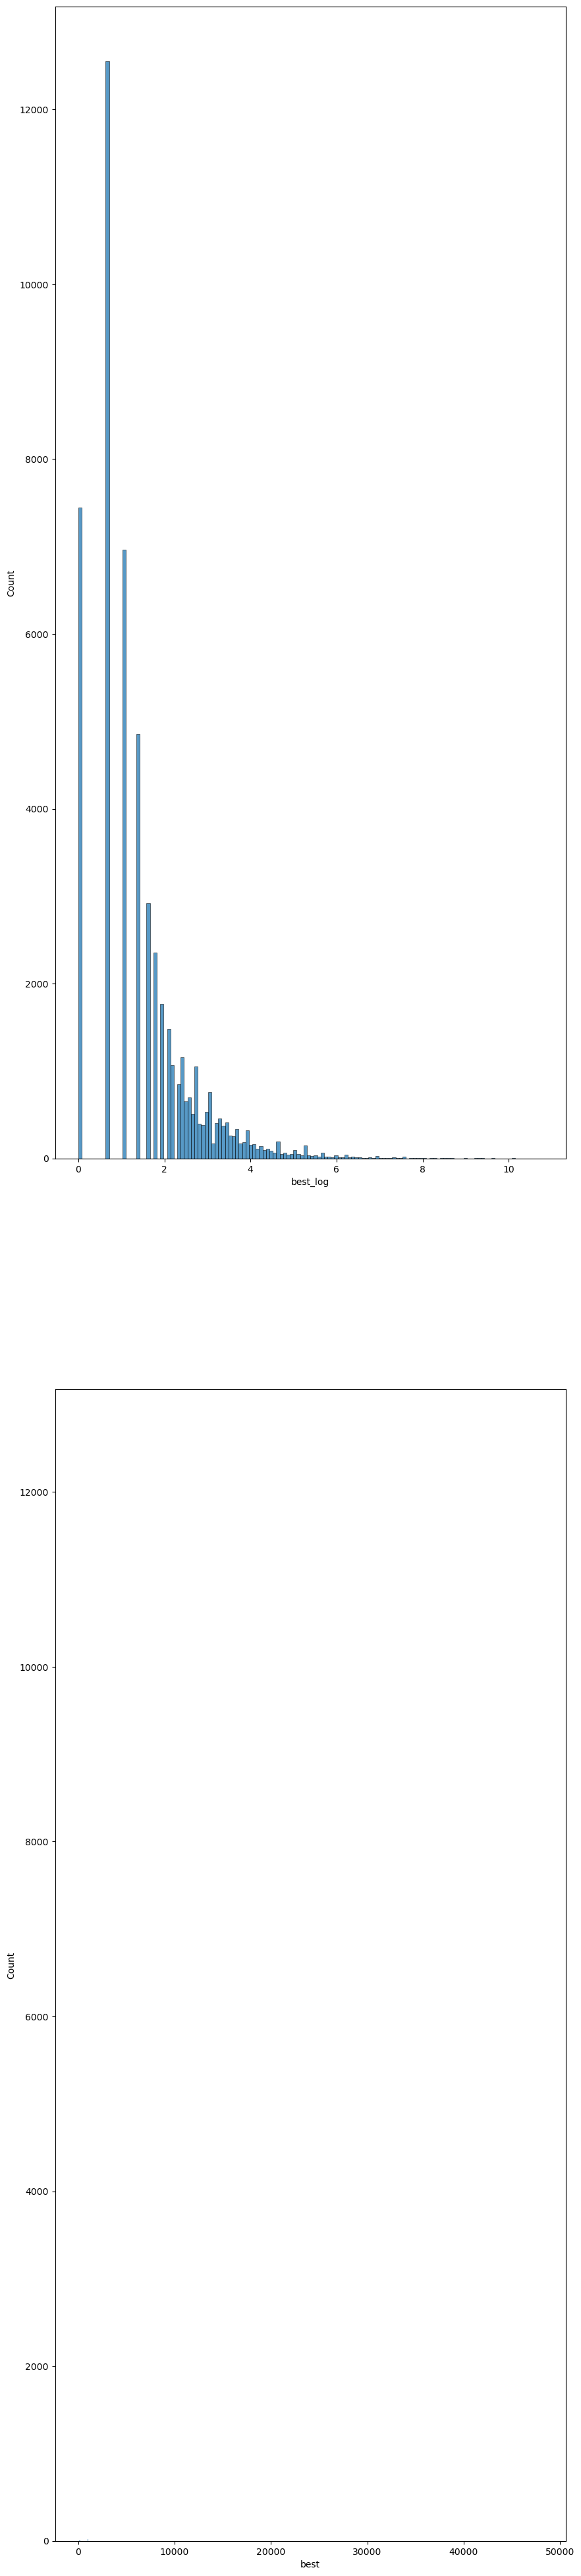

In [35]:
#log transfrom the best fatalities estimates
df_conflict['best_log'] = np.log1p(df_conflict['best'])
#compare skewed and logtransformed best
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
figure, axes = plt.subplots(2,1,figsize=(10,50))
sns.histplot(df_conflict['best_log'],ax=axes[0])
sns.histplot(df_conflict['best'],ax=axes[1])

plt.savefig('conflict_log.png')

Now import the other dataset to get estimates elading back to 1970 for the lags

In [36]:
#now produce the lags and filter out the unwanted years
#now I need to loop the lagging function, creating a new column and appending them all together to then have a dataframe i can concanate
df_conflict = df_conflict.loc[df_conflict['year'] <= 2019]
df_conflict['lag_best_1'] = df_conflict.groupby('iso')['best_log'].shift(1)
df_conflict['lag_best_2'] = df_conflict.groupby('iso')['best_log'].shift(2)
df_conflict['lag_best_3'] = df_conflict.groupby('iso')['best_log'].shift(3)
df_conflict['lag_best_4'] = df_conflict.groupby('iso')['best_log'].shift(4)
df_conflict['lag_best_5'] = df_conflict.groupby('iso')['best_log'].shift(5)
df_conflict['lag_best_6'] = df_conflict.groupby('iso')['best_log'].shift(6)
df_conflict['lag_best_7'] = df_conflict.groupby('iso')['best_log'].shift(7)
df_conflict['lag_best_8'] = df_conflict.groupby('iso')['best_log'].shift(8)
df_conflict['lag_best_9'] = df_conflict.groupby('iso')['best_log'].shift(9)
df_conflict['lag_best_10'] = df_conflict.groupby('iso')['best_log'].shift(10)
#df_conflict = df_conflict.loc[df_conflict['year'] >= 1990]

df_conflict

,year,type_of_violence,best,high,low,dummy_neighbor,iso,dummy_conflict,dummy_sb,dummy_ns,...,lag_best_1,lag_best_2,lag_best_3,lag_best_4,lag_best_5,lag_best_6,lag_best_7,lag_best_8,lag_best_9,lag_best_10
41447,1990,sb,1.0,1.0,1.0,0.0,DZA,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41448,1991,sb,3.0,3.0,3.0,0.0,DZA,0,1,0,...,0.693147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41449,1991,sb,4.0,4.0,4.0,0.0,DZA,0,1,0,...,1.386294,0.693147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41450,1991,sb,10.0,10.0,10.0,0.0,DZA,0,1,0,...,1.609438,1.386294,0.693147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41451,1991,sb,17.0,17.0,17.0,0.0,DZA,0,1,0,...,2.397895,1.609438,1.386294,0.693147,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299254,2019,NaN,NaN,NaN,NaN,0.0,NAM,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299256,2019,NaN,NaN,NaN,NaN,0.0,MUS,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299257,2019,NaN,NaN,NaN,NaN,0.0,SYC,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299274,2019,NaN,NaN,NaN,NaN,0.0,MAR,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df_conflict.columns

Index(['year', 'type_of_violence', 'best', 'high', 'low', 'dummy_neighbor',
       'iso', 'dummy_conflict', 'dummy_sb', 'dummy_ns', 'dummy_os', 'best_log',
       'lag_best_1', 'lag_best_2', 'lag_best_3', 'lag_best_4', 'lag_best_5',
       'lag_best_6', 'lag_best_7', 'lag_best_8', 'lag_best_9', 'lag_best_10'],
      dtype='object')

In [38]:
df_conflict = df_conflict.drop(columns=['best', 'high', 'low'])
df_conflict

,year,type_of_violence,dummy_neighbor,iso,dummy_conflict,dummy_sb,dummy_ns,dummy_os,best_log,lag_best_1,lag_best_2,lag_best_3,lag_best_4,lag_best_5,lag_best_6,lag_best_7,lag_best_8,lag_best_9,lag_best_10
41447,1990,sb,0.0,DZA,0,1,0,0,0.693147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41448,1991,sb,0.0,DZA,0,1,0,0,1.386294,0.693147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41449,1991,sb,0.0,DZA,0,1,0,0,1.609438,1.386294,0.693147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41450,1991,sb,0.0,DZA,0,1,0,0,2.397895,1.609438,1.386294,0.693147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41451,1991,sb,0.0,DZA,0,1,0,0,2.890372,2.397895,1.609438,1.386294,0.693147,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299254,2019,NaN,0.0,NAM,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299256,2019,NaN,0.0,MUS,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299257,2019,NaN,0.0,SYC,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299274,2019,NaN,0.0,MAR,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df_conflict.to_csv('df_conflict.csv')

## 3. Import and clean up of the Control Variables

In [2]:
##set a new working directory
user = os.path.expanduser('~')
display(user)

os.makedirs(f'{user}/Desktop/private/thesis/', exist_ok=True)
path = os.chdir(f'{user}/Desktop/'+'private/thesis/control variables/')

'/Users/NatStrom'

In [ ]:
def nullcounts(ser):
    return ser.isnull().sum()

def custom_describe(frame, func=[nullcounts, 'sum', 'mean', 'median', 'max'],
                    numeric_only=True, **kwargs):
    if numeric_only:
        frame = frame.select_dtypes(include=np.number)
    return frame.agg(func, **kwargs)

3.1. WDI indicator

In [ ]:
data_age = pd.read_csv('pop0014.csv',skiprows= 4)
data_gdp = pd.read_csv('gdp_pcap.csv',skiprows=4)
data_xpd_gdp = pd.read_csv('expense_gdp.csv',skiprows=4)

In [ ]:
display(data_age.columns)
display(data_xpd_gdp.columns)
display(data_gdp.columns)
display(data_age)
display(data_xpd_gdp)
display(data_gdp)

In [ ]:
#stack, filter and rename the columns
##rename
data_age = data_age.rename(columns= {'Country Code':'iso'})
data_xpd_gdp = data_xpd_gdp.rename(columns= {'Country Code':'iso'})
data_gdp = data_gdp.rename(columns= {'Country Code':'iso'})
##filter the needed columns
data_age = data_age.drop(columns=['Country Name','Indicator Name', 'Indicator Code','Unnamed: 66'])
data_xpd_gdp = data_xpd_gdp.drop(columns=['Country Name','Indicator Name', 'Indicator Code','Unnamed: 66'])
data_gdp = data_gdp.drop(columns=['Country Name','Indicator Name', 'Indicator Code','Unnamed: 66'])
##stack the individual year columns
data_age = data_age.melt(id_vars='iso',var_name='year_id',value_name='age0014_value')
data_xpd_gdp = data_xpd_gdp.melt(id_vars='iso',var_name='year_id',value_name='xpd_gdp_value')
data_gdp = data_gdp.melt(id_vars='iso',var_name='year_id',value_name='gdp_pcap_value')

display(data_age)
display(data_xpd_gdp)
display(data_gdp)

In [ ]:
data_gdp['year_id'] = data_gdp['year_id'].astype(str).astype(int)
data_age['year_id'] = data_age['year_id'].astype(str).astype(int)
data_xpd_gdp['year_id'] = data_xpd_gdp['year_id'].astype(str).astype(int)

In [ ]:
#merge them together
data_wdi = pd.merge(data_age,data_gdp, how="outer", on=["iso", "year_id"])
data_wdi = pd.merge(data_wdi,data_xpd_gdp, how="outer", on=["iso", "year_id"])
display(data_wdi)

In [ ]:
## only years from 1980 onwards
data_wdi = data_wdi.loc[data_wdi['year_id'] >= 1990]
data_wdi = data_wdi.loc[data_wdi['year_id'] <= 2019]

In [ ]:
data_wdi = data_wdi.loc[data_wdi['iso'].isin(['AGO', 'BDI', 'BEN', 'BFA', 'BWA', 'CAF', 'CIV', 'CMR', 'COD',
       'COG', 'COM', 'CPV', 'DJI', 'ERI', 'ETH', 'GAB', 'GHA', 'GIN',
       'GMB', 'GNB', 'GNQ', 'KEN', 'LBR', 'LSO', 'MDG', 'MLI', 'MOZ',
       'MRT', 'MWI', 'NAM', 'NER', 'NGA', 'RWA', 'SDN', 'SEN', 'SLE',
       'SOM', 'SSD', 'STP', 'SWZ', 'TCD', 'TGO', 'TZA', 'UGA', 'ZAF',
       'ZMB', 'ZWE'])]

In [ ]:
data_wdi

In [ ]:
#test for missingness
#getting the % of missing values in each column
values_list = list()
cols_list = list() #creating empty lists

for col in data_wdi.columns:
    pct_missing= np.mean(data_wdi[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

In [ ]:
custom_describe(data_wdi)

In [ ]:
display(data_wdi.stb.freq(['iso','year_id'],value='age0014_value'))
display(data_wdi.stb.freq(['iso','year_id'],value='gdp_pcap_value'))
display(data_wdi.stb.freq(['iso','year_id'],value='xpd_gdp_value'))

In [ ]:
#get a histogram
#create histograms for all mean variables
figure, axes = plt.subplots(3,1,figsize=(10,55))
sns.histplot(data_wdi['age0014_value'],ax=axes[0])
sns.histplot(data_wdi['gdp_pcap_value'],ax=axes[1])
sns.histplot(data_wdi['xpd_gdp_value'],ax=axes[2])
plt.savefig('wdi1.png')

In [ ]:
#create trendlines
figure, axes = plt.subplots(3,1,figsize=(10,60))

sns.lineplot(x='year_id',y='age0014_value',data=data_wdi,err_style='bars',ax=axes[0])
sns.lineplot(x='year_id',y='gdp_pcap_value',data=data_wdi,err_style='bars',ax=axes[1])
sns.lineplot(x='year_id',y='xpd_gdp_value',data=data_wdi,err_style='bars',ax=axes[2])

plt.savefig('wdi2.png')

In [ ]:
#logtransform the wdi_gdp variable
data_wdi['gdp_log'] = np.log(data_wdi['gdp_pcap_value'])
data_wdi

In [ ]:
#compare skewed and logtransformed gdp
figure, axes = plt.subplots(2,1,figsize=(10,55))
sns.histplot(data_wdi['gdp_log'],ax=axes[0])
sns.histplot(data_wdi['gdp_pcap_value'],ax=axes[1])
plt.savefig('wdi_log.png')

In [ ]:
#save to csv
data_wdi.to_csv('data_wdi.csv')

3.2. Development assistance to health

In [ ]:
#load data (already cleaned up)
data_dah = pd.read_csv('DAH.csv')
display(data_dah)

In [ ]:
data_dah = data_dah.loc[data_dah['iso'].isin(['AGO', 'BDI', 'BEN', 'BFA', 'BWA', 'CAF', 'CIV', 'CMR', 'COD',
       'COG', 'COM', 'CPV', 'DJI', 'ERI', 'ETH', 'GAB', 'GHA', 'GIN',
       'GMB', 'GNB', 'GNQ', 'KEN', 'LBR', 'LSO', 'MDG', 'MLI', 'MOZ',
       'MRT', 'MWI', 'NAM', 'NER', 'NGA', 'RWA', 'SDN', 'SEN', 'SLE',
       'SOM', 'SSD', 'STP', 'SWZ', 'TCD', 'TGO', 'TZA', 'UGA', 'ZAF',
       'ZMB', 'ZWE'])]

In [ ]:
custom_describe(data_dah)

In [ ]:
data_dah.columns
data_dah = data_dah.filter(['country', 'year_id', 'iso','ihme_dah_total_aid'])

In [ ]:
#check for missingness
#getting the % of missing values in each column
values_list = list()
cols_list = list() #creating empty lists

for col in data_dah.columns:
    pct_missing= np.mean(data_dah[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

In [ ]:
#create histograms for all mean variables

sns.histplot(data_dah['ihme_dah_total_aid'],kde= True)

plt.savefig('dah1.png')

In [ ]:
#create trendlines
sns.lineplot(x='year_id',y='ihme_dah_total_aid',data=data_dah,err_style='bars')

plt.savefig('dah2.png')

In [ ]:
#logtransform the aid
data_dah['dah_total_log'] = np.log(data_dah['ihme_dah_total_aid'])
display(data_dah)

figure, axes = plt.subplots(2,1,figsize=(10,55))
sns.histplot(data_dah['ihme_dah_total_aid'],ax=axes[0])
sns.histplot(data_dah['dah_total_log'],ax=axes[1])

plt.savefig('dah_log.png')

In [ ]:
custom_describe(data_dah)

In [ ]:
data_dah.to_csv('data_dah.csv')

3.3.  WASH, ND-GAIN country indicators

In [ ]:
#load data
data_water = pd.read_csv('access_drink.csv')
data_sani = pd.read_csv('access_sani.csv')
display(data_water, data_sani)

In [ ]:
#stack, filter and rename the columns
##rename
data_water = data_water.rename(columns= {'ISO3':'iso'})
data_sani = data_sani.rename(columns= {'ISO3':'iso'})
##filter the needed columns
data_sani = data_sani.drop(columns=['Name'])
data_water = data_water.drop(columns=['Name'])
##stack the individual year columns
data_water = data_water.melt(id_vars='iso',var_name='year_id',value_name='access_drinkwater_index')
data_sani = data_sani.melt(id_vars='iso',var_name='year_id',value_name='access_sani_index')

In [ ]:
display(data_sani.dtypes, data_water.dtypes)
data_water['year_id'] = data_water['year_id'].astype(str).astype(int)
data_sani['year_id'] = data_sani['year_id'].astype(str).astype(int)

In [ ]:
data_wash = pd.merge(data_water,data_sani, how="outer", on=["iso", "year_id"])

In [ ]:
#group by country-year & only filter iso for  SSA)
data_wash = data_wash.loc[data_wash['iso'].isin(['AGO', 'BDI', 'BEN', 'BFA', 'BWA', 'CAF', 'CIV', 'CMR', 'COD',
       'COG', 'COM', 'CPV', 'DJI', 'ERI', 'ETH', 'GAB', 'GHA', 'GIN',
       'GMB', 'GNB', 'GNQ', 'KEN', 'LBR', 'LSO', 'MDG', 'MLI', 'MOZ',
       'MRT', 'MWI', 'NAM', 'NER', 'NGA', 'RWA', 'SDN', 'SEN', 'SLE',
       'SOM', 'SSD', 'STP', 'SWZ', 'TCD', 'TGO', 'TZA', 'UGA', 'ZAF',
       'ZMB', 'ZWE'])]
data_wash = data_wash.groupby(['iso','year_id']).sum().reset_index()
display(data_wash)

In [ ]:
#test for missingness
#getting the % of missing values in each column
values_list = list()
cols_list = list() #creating empty lists

for col in data_wash.columns:
    pct_missing= np.mean(data_wash[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

In [ ]:
custom_describe(data_wash)

In [ ]:
figure, axes = plt.subplots(2,1,figsize=(10,60))
sns.histplot(data_wash['access_drinkwater_index'],kde = True,ax=axes[0])
sns.histplot(data_wash['access_sani_index'],kde = True,ax=axes[1])

plt.savefig('wash1.png')

In [ ]:
#create trendlines
figure, axes = plt.subplots(2,1,figsize=(10,60))
sns.lineplot(x='year_id',y='access_drinkwater_index',data=data_wash,ax=axes[0])
sns.lineplot(x='year_id',y='access_sani_index',data=data_wash,ax=axes[1])

plt.savefig('wash2.png')

In [ ]:
data_wash.to_csv('data_wash.csv')

3.4. Exposure and Vulnerability

In [ ]:
def report(df):
    print()
    print(f"A dataset with {len(df.columns)} columns, with "
          f"data between t {min(df.index.get_level_values(0))} "
          f"and {max(df.index.get_level_values(0))}. "
          f"({len(np.unique(df.index.get_level_values(1)))} units)"
          )
    return

In [ ]:
#look if the data is already in the views system
!viewser tables list

In [ ]:
!viewser tables show gdis_pgy

In [ ]:
#define the preliminers t (1990 till 2019) and c_ids
#transform pgy into cy
data_disaster = (Queryset("gdis_pgy", "priogrid_year")
                 .with_column(Column("gdis_count", from_table="gdis_pgy", from_column="gids_disasterno_count"))
                # .agggregate('sum')
                 .with_column(Column("gdis_nunique", from_table="gdis_pgy", from_column="gids_disasterno_nunique"))
                # .agggregate('sum')
                 .with_column(Column("gdis_type", from_table="gdis_pgy", from_column="gids_disastertype_join")))


data_disaster = data_disaster.publish().fetch()

data_disaster

In [ ]:
data_disaster= data_disaster.reset_index()
data_disaster = data_disaster.rename(columns={'priogrid_gid':'pg_id'})
data_disaster = data_disaster[data_disaster['year_id'] <=2019] 
data_disaster = data_disaster[data_disaster['year_id'] >=1990] 
data_disaster = data_disaster[(data_disaster.pgy.lon.between(-10,40)) & (data_disaster.pgy.lat.between(-35,+35))]
#filter in africa
data_disaster

In [ ]:
# Look how easy it is to convert a PGY df to a CY dataframe. Ready for aggregation!
data_disaster['c_id'] = data_disaster.pgy.c_id
data_disaster

In [ ]:
#get the iso numbers
data_disaster['iso'] = data_disaster.c.isoab
data_disaster

In [ ]:
inspect = data_disaster.loc[data_disaster.iso.isna()]
display(inspect)

In [ ]:
data_disaster = data_disaster.loc[data_disaster['iso'].isin(['AGO', 'BDI', 'BEN', 'BFA', 'BWA', 'CAF', 'CIV', 'CMR', 'COD',
       'COG', 'COM', 'CPV', 'DJI', 'ERI', 'ETH', 'GAB', 'GHA', 'GIN',
       'GMB', 'GNB', 'GNQ', 'KEN', 'LBR', 'LSO', 'MDG', 'MLI', 'MOZ',
       'MRT', 'MWI', 'NAM', 'NER', 'NGA', 'RWA', 'SDN', 'SEN', 'SLE',
       'SOM', 'SSD', 'STP', 'SWZ', 'TCD', 'TGO', 'TZA', 'UGA', 'ZAF',
       'ZMB', 'ZWE'])]
data_disaster = data_disaster.groupby(['iso','year_id']).sum().reset_index()
display(data_disaster)

In [ ]:
#clean up columns
data_disaster = data_disaster.drop(columns={'c_id'})

In [ ]:
#example distribution plot with kernel densities
%matplotlib inline 
figure, axes = plt.subplots(2,1,figsize=(10,60))
sns.displot(data_disaster['gdis_count'],kde=True,ax=axes[0])
sns.displot(data_disaster['gdis_nunique'],kde=True,ax=axes[1])
plt.savefig('data_disaster1.png')

In [ ]:
#create trendlines
figure, axes = plt.subplots(2,1,figsize=(10,60))

sns.lineplot(x='year_id',y='gdis_count',data=data_disaster,err_style='bars',ax=axes[0])
sns.lineplot(x='year_id',y='gdis_nunique',data=data_disaster,err_style='bars',ax=axes[1])
plt.savefig('data_disaster2.png')

In [ ]:
#test for missingness
values_list = list()
cols_list = list() 
for col in data_disaster.columns:
    pct_missing= np.mean(data_disaster[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

In [ ]:
#logtransform the variable
data_disaster['gdis_count_lag'] = np.log1p(data_disaster['gdis_count'])
display(data_disaster)

figure, axes = plt.subplots(2,1,figsize=(10,55))
sns.histplot(data_disaster['gdis_count'],ax=axes[0])
sns.histplot(data_disaster['gdis_count_lag'],ax=axes[1])

plt.savefig('disaster_log.png')

In [ ]:
data_disaster.to_csv('data_disaster.csv')

3.5. EMDAT data for vulnerability

In [ ]:
import openpyxl
workbook = openpyxl.load_workbook('emdat.xlsx')
import openpyxl

# Select the worksheet to work with
worksheet = workbook['emdat data']
all_cells = worksheet.rows

# Create an empty list to store the data
data = []

# Iterate through each row of cells and extract the values
for row in all_cells:
    row_data = []
    for cell in row:
        row_data.append(cell.value)
    data.append(row_data)

# Create a pandas DataFrame from the data
data_vn = pd.DataFrame(data)

# Optionally, set the column names to the first row of the worksheet
data_vn.columns = data_vn.iloc[0]
data_vn = data_vn[1:]

In [ ]:
data_vn

In [ ]:
data_vn.columns

In [ ]:
data_vn['Total Deaths'] = data_vn['Total Deaths'].astype(float)
data_vn['Total Affected'] = data_vn['Total Affected'].astype(float)
data_vn['Year'] = data_vn['Year'].astype(float)

In [ ]:
data_vn = data_vn.filter(['Year','ISO','Total Deaths','Total Affected'])
#rename the columns
data_vn = data_vn.rename(columns={'Year':'year_id','Total Deaths':'death_tot','Total Affected':'tot_affect'})
#fix the temporal scope
data_vn = data_vn[data_vn['year_id'] >=1990] 
data_vn = data_vn[data_vn['year_id'] <=2019] 

In [ ]:
data_vn = data_vn.loc[data_vn['ISO'].isin(['AGO', 'BDI', 'BEN', 'BFA', 'BWA', 'CAF', 'CIV', 'CMR', 'COD',
       'COG', 'COM', 'CPV', 'DJI', 'ERI', 'ETH', 'GAB', 'GHA', 'GIN',
       'GMB', 'GNB', 'GNQ', 'KEN', 'LBR', 'LSO', 'MDG', 'MLI', 'MOZ',
       'MRT', 'MWI', 'NAM', 'NER', 'NGA', 'RWA', 'SDN', 'SEN', 'SLE',
       'SOM', 'SSD', 'STP', 'SWZ', 'TCD', 'TGO', 'TZA', 'UGA', 'ZAF',
       'ZMB', 'ZWE'])]
data_vn = data_vn.groupby(['ISO','year_id']).sum().reset_index()
display(data_vn)

In [ ]:
data_vn = data_vn.rename(columns={'ISO':'iso'})

In [ ]:
#get descriptives
custom_describe(data_vn)

In [ ]:
#example distribution plot with kernel densities
%matplotlib inline 
figure, axes = plt.subplots(2,1,figsize=(10,60))

sns.displot(data_vn['death_tot'], kde=True, ax= axes[0])
sns.displot(data_vn['tot_affect'], kde=True, ax= axes[1])
plt.savefig('emdat1.png')

In [ ]:
#create trendlines
figure, axes = plt.subplots(2,1,figsize=(10,60))

sns.lineplot(x='year_id',y='death_tot',data=data_vn,err_style='bars',ax=axes[0])
sns.lineplot(x='year_id',y='tot_affect',data=data_vn,err_style='bars',ax=axes[1])
plt.savefig('emdat2.pdf')

In [ ]:
#inspect missingness
values_list = list()
cols_list = list() 
for col in data_vn.columns:
    pct_missing= np.mean(data_vn[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

In [ ]:
data_vn.to_csv('data_vn.csv')

3.6. Universal Health Care Coverage (UHC) + health worker density

In [ ]:
data_uhc = pd.read_csv('Universal Health Coverage.csv')
data_worker =pd.read_csv('Health Worker Density.csv')

In [ ]:
print(data_uhc.dtypes)
print(data_uhc.columns)
print(data_uhc.describe(include='all'))
print(data_uhc.year_id.unique())

In [ ]:
print(data_worker.dtypes)
print(data_worker.columns)
print(data_worker.describe(include='all'))
print(data_worker.year_id.unique())

In [ ]:
data_worker = data_worker.filter(['ihme_healthworkers_all_mean','year_id','iso'])
data_worker
                           

In [ ]:
data_worker = data_worker.loc[data_worker['iso'].isin(['COG', 'MWI', 'MDG', 'GNQ', 'AGO', 'COM', 'ETH', 'ERI', 'BWA',
       'BDI', 'CAF', 'NER', 'DJI', 'TCD', 'MRT', 'CPV', 'MOZ', 'ZMB',
       'CIV', 'GAB', 'SWZ', 'ZWE', 'BEN', 'COD', 'SOM', 'LSO', 'NAM',
       'STP', 'SSD', 'ZAF', 'UGA', 'KEN', 'NGA', 'MLI', 'SDN', 'LBR',
       'TGO', 'TZA', 'GMB', 'RWA', 'GIN', 'GHA', 'CMR', 'BFA', 'SEN',
       'SLE', 'GNB'])]
data_worker = data_worker.groupby(['iso','year_id']).sum().reset_index()
display(data_worker)

In [ ]:
## only years from 1990 onwards
data_worker = data_worker.loc[data_uhc['year_id'] >= 1990]

In [ ]:
#test for missingness
#getting the % of missing values in each column
values_list = list()
cols_list = list() #creating empty lists

for col in data_worker.columns:
    pct_missing= np.mean(data_worker[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

In [ ]:
#get a histogram
sns.histplot(data_worker['ihme_healthworkers_all_mean'],kde=True)


plt.savefig('healthworker1.png')

In [ ]:
data_worker.year_id.unique()

In [ ]:
#create trendlines
sns.lineplot(x='year_id',y='ihme_healthworkers_all_mean',data=data_worker,err_style='bars')
plt.savefig('healthworker2.png')

In [ ]:
#save to csv
data_worker.to_csv('data_hwd.csv')

3.7. Population size (this indicator has been added later and is not included in the Analysis)

In [3]:
#import population size
dta = pd.read_csv('pop_size.csv',skiprows= 4)
display(dta.columns)
dta

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       'Unnamed: 67'],
      dtype='object')

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720839314.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1761985.0,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0,NaN
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,...,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0,NaN
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0,NaN


In [5]:
dta

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720839314.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1761985.0,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0,NaN
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,...,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0,NaN
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0,NaN


In [6]:
#clean up
dta = dta.drop(columns=['Country Name','Indicator Name', 'Indicator Code','Unnamed: 67'])
dta = dta.rename(columns= {'Country Code':'iso'})
dta = dta.melt(id_vars='iso',var_name='year_id',value_name='pop_size')
dta['year_id'] = dta['year_id'].astype(str).astype(int)

## only years from 1990 onwards
dta = dta.loc[dta['year_id'] >= 1990]
dta = dta.loc[dta['year_id'] <= 2019]
#only countries in SSA
dta = dta.loc[dta['iso'].isin(['AGO', 'BDI', 'BEN', 'BFA', 'BWA', 'CAF', 'CIV', 'CMR', 'COD',
       'COG', 'COM', 'CPV', 'DJI', 'ERI', 'ETH', 'GAB', 'GHA', 'GIN',
       'GMB', 'GNB', 'GNQ', 'KEN', 'LBR', 'LSO', 'MDG', 'MLI', 'MOZ',
       'MRT', 'MWI', 'NAM', 'NER', 'NGA', 'RWA', 'SDN', 'SEN', 'SLE',
       'SOM', 'SSD', 'STP', 'SWZ', 'TCD', 'TGO', 'TZA', 'UGA', 'ZAF',
       'ZMB', 'ZWE'])]

#save
dta.to_csv('data_pop_size.csv')

In [ ]:
display(custom_describe(data_dah))
display(custom_describe(data_uhc))

In [ ]:
custom_describe(data_wdi)

In [ ]:
display(custom_describe(data_wash))
display(custom_describe(data_disaster))
display(custom_describe(data_vn))

## 4. Merging of the datasets

In [2]:
data_conflict = pd.read_csv('df_conflict.csv')
data_DALY = pd.read_csv('df_DALY_SSA.csv')

'/Users/NatStrom'

In [3]:
data_conflict.dtypes

Unnamed: 0            int64
year                  int64
type_of_violence     object
dummy_neighbor      float64
iso                  object
dummy_conflict        int64
dummy_sb              int64
dummy_ns              int64
dummy_os              int64
best_log            float64
lag_best_1          float64
lag_best_2          float64
lag_best_3          float64
lag_best_4          float64
lag_best_5          float64
lag_best_6          float64
lag_best_7          float64
lag_best_8          float64
lag_best_9          float64
lag_best_10         float64
dtype: object

In [4]:
data_DALY.dtypes

Unnamed: 0       int64
measure_name    object
country         object
location_id      int64
sex             object
age             object
rei_id           int64
cause_name      object
cause_id         int64
rei_name        object
year             int64
daly_mean        int64
daly_upper       int64
daly_lower       int64
iso             object
dtype: object

In [5]:
#inspect missingness
is_null = data_DALY.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_DALY.columns:
    pct_missing= np.mean(data_DALY[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

Unnamed: 0      0
measure_name    0
country         0
location_id     0
sex             0
age             0
rei_id          0
cause_name      0
cause_id        0
rei_name        0
year            0
daly_mean       0
daly_upper      0
daly_lower      0
iso             0
dtype: int64
             col  pct_missing
0     Unnamed: 0          0.0
1   measure_name          0.0
2        country          0.0
3    location_id          0.0
4            sex          0.0
5            age          0.0
6         rei_id          0.0
7     cause_name          0.0
8       cause_id          0.0
9       rei_name          0.0
10          year          0.0
11     daly_mean          0.0
12    daly_upper          0.0
13    daly_lower          0.0
14           iso          0.0


In [6]:
#inspect missingness
is_null = data_conflict.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_conflict.columns:
    pct_missing= np.mean(data_conflict[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

Unnamed: 0             0
year                   0
type_of_violence    1391
dummy_neighbor      2233
iso                    0
dummy_conflict         0
dummy_sb               0
dummy_ns               0
dummy_os               0
best_log            1391
lag_best_1          1392
lag_best_2          1393
lag_best_3          1394
lag_best_4          1395
lag_best_5          1396
lag_best_6          1397
lag_best_7          1398
lag_best_8          1399
lag_best_9          1400
lag_best_10         1404
dtype: int64
                 col  pct_missing
0         Unnamed: 0     0.000000
1               year     0.000000
2   type_of_violence     2.903179
3     dummy_neighbor     4.660531
4                iso     0.000000
5     dummy_conflict     0.000000
6           dummy_sb     0.000000
7           dummy_ns     0.000000
8           dummy_os     0.000000
9           best_log     2.903179
10        lag_best_1     2.905266
11        lag_best_2     2.907353
12        lag_best_3     2.909440
13        l

In [7]:
data_DALY = data_DALY.rename(columns= {'year':'year_id'})
data_conflict = data_conflict.rename(columns= {'year':'year_id'})

In [9]:
data_DALY.iso.unique()

array(['COG', 'MWI', 'MDG', 'GNQ', 'AGO', 'COM', 'ETH', 'ERI', 'BWA',
       'BDI', 'CAF', 'NER', 'DJI', 'TCD', 'MRT', 'CPV', 'MOZ', 'ZMB',
       'CIV', 'GAB', 'SWZ', 'ZWE', 'BEN', 'COD', 'SOM', 'LSO', 'NAM',
       'STP', 'SSD', 'ZAF', 'UGA', 'KEN', 'NGA', 'MLI', 'SDN', 'LBR',
       'TGO', 'TZA', 'GMB', 'RWA', 'GIN', 'GHA', 'CMR', 'BFA', 'SEN',
       'SLE', 'GNB'], dtype=object)

In [10]:
data_conflict.iso.unique()

array(['DZA', 'AGO', 'BEN', 'BWA', 'BFA', 'BDI', 'CMR', 'CAF', 'TCD',
       'COM', 'COG', 'DJI', 'COD', 'EGY', 'ERI', 'ETH', 'GMB', 'GHA',
       'GIN', 'GNB', 'CIV', 'KEN', 'SWZ', 'LSO', 'LBR', 'LBY', 'MDG',
       'MLI', 'MRT', 'MAR', 'MOZ', 'NAM', 'NER', 'NGA', 'RWA', 'SEN',
       'SLE', 'SOM', 'ZAF', 'SSD', 'SDN', 'TZA', 'TGO', 'TUN', 'UGA',
       'ZMB', 'ZWE', 'CPV', 'GNQ', 'STP', 'MWI', 'GAB', 'MUS', 'SYC'],
      dtype=object)

In [11]:
data_conflict = data_conflict.loc[data_conflict['iso'].isin(['AGO', 'BDI', 'BEN', 'BFA', 'BWA', 'CAF', 'CIV', 'CMR', 'COD',
       'COG', 'COM', 'CPV', 'DJI', 'ERI', 'ETH', 'GAB', 'GHA', 'GIN',
       'GMB', 'GNB', 'GNQ', 'KEN', 'LBR', 'LSO', 'MDG', 'MLI', 'MOZ',
       'MRT', 'MWI', 'NAM', 'NER', 'NGA', 'RWA', 'SDN', 'SEN', 'SLE',
       'SOM', 'SSD', 'STP', 'SWZ', 'TCD', 'TGO', 'TZA', 'UGA', 'ZAF',
       'ZMB', 'ZWE'])]

In [12]:
data_DALY = data_DALY.pivot_table(index=['iso','year_id'],columns=['cause_name','rei_name','sex','age'],values=['daly_mean'],  aggfunc= 'sum')

data_DALY.assign(**data_DALY.index.to_frame()) #need to do this if the data is multihierarchical

data_DALY.columns = ['_'.join(col) for col in data_DALY.columns]
data_DALY=data_DALY.reset_index()
data_DALY

,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages,daly_mean_Diarrheal diseases_Unsafe water source_btsx_All ages,daly_mean_Enteric infections_No access to handwashing facility_btsx_All ages,daly_mean_Enteric infections_Unsafe sanitation_btsx_All ages,daly_mean_Enteric infections_Unsafe water source_btsx_All ages,daly_mean_Lower respiratory infections_No access to handwashing facility_btsx_All ages,daly_mean_Respiratory infections and tuberculosis_No access to handwashing facility_btsx_All ages
0,AGO,1990,12264,17229,23733,12264,17229,23733,8904,17229,23733,8904,17229,23733,3360,3360
1,AGO,1991,11985,16760,23173,11985,16760,23173,8693,16760,23173,8693,16760,23173,3291,3291
2,AGO,1992,11662,16176,22487,11662,16176,22487,8433,16176,22487,8433,16176,22487,3228,3228
3,AGO,1993,11480,15822,22089,11480,15822,22089,8283,15822,22089,8283,15822,22089,3196,3196
4,AGO,1994,11380,15681,21970,11380,15681,21970,8236,15681,21970,8236,15681,21970,3144,3144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,ZWE,2015,1672,1155,1739,1672,1155,1739,632,1155,1739,632,1155,1739,1040,1040
1406,ZWE,2016,1630,1110,1682,1630,1110,1682,610,1110,1682,610,1110,1682,1019,1019
1407,ZWE,2017,1578,1073,1638,1578,1073,1638,593,1073,1638,593,1073,1638,984,984
1408,ZWE,2018,1503,1001,1539,1503,1001,1539,557,1001,1539,557,1001,1539,946,946


In [14]:
#import the control variables
data_dah = pd.read_csv('control variables/data_dah.csv')
data_wdi = pd.read_csv('control variables/data_wdi.csv')
data_vn = pd.read_csv('control variables/data_vn.csv')
data_disaster = pd.read_csv('control variables/data_disaster.csv')
data_wash = pd.read_csv('control variables/data_wash.csv')
data_hwd = pd.read_csv('control variables/data_hwd.csv')

In [15]:
data_hwd.iso.unique()

array(['AGO', 'BDI', 'BEN', 'BFA', 'BWA', 'CAF', 'CIV', 'CMR', 'COD',
       'COG', 'COM', 'CPV', 'DJI', 'ERI', 'ETH', 'GAB', 'GHA', 'GIN',
       'GMB', 'GNB', 'GNQ', 'KEN', 'LBR', 'LSO', 'MDG', 'MLI', 'MOZ',
       'MRT', 'MWI', 'NAM', 'NER', 'NGA', 'RWA', 'SDN', 'SEN', 'SLE',
       'SOM', 'SSD', 'STP', 'SWZ', 'TCD', 'TGO', 'TZA', 'UGA', 'ZAF',
       'ZMB', 'ZWE'], dtype=object)

In [16]:
data_wash.iso.unique()
#missingg south sudan

array(['AGO', 'BDI', 'BEN', 'BFA', 'BWA', 'CAF', 'CIV', 'CMR', 'COD',
       'COG', 'COM', 'CPV', 'DJI', 'ERI', 'ETH', 'GAB', 'GHA', 'GIN',
       'GMB', 'GNB', 'GNQ', 'KEN', 'LBR', 'LSO', 'MDG', 'MLI', 'MOZ',
       'MRT', 'MWI', 'NAM', 'NER', 'NGA', 'RWA', 'SDN', 'SEN', 'SLE',
       'SOM', 'STP', 'SWZ', 'TCD', 'TGO', 'TZA', 'UGA', 'ZAF', 'ZMB',
       'ZWE'], dtype=object)

In [17]:
data_DALY.iso.unique()

array(['AGO', 'BDI', 'BEN', 'BFA', 'BWA', 'CAF', 'CIV', 'CMR', 'COD',
       'COG', 'COM', 'CPV', 'DJI', 'ERI', 'ETH', 'GAB', 'GHA', 'GIN',
       'GMB', 'GNB', 'GNQ', 'KEN', 'LBR', 'LSO', 'MDG', 'MLI', 'MOZ',
       'MRT', 'MWI', 'NAM', 'NER', 'NGA', 'RWA', 'SDN', 'SEN', 'SLE',
       'SOM', 'SSD', 'STP', 'SWZ', 'TCD', 'TGO', 'TZA', 'UGA', 'ZAF',
       'ZMB', 'ZWE'], dtype=object)

In [18]:
data_conflict.iso.unique()

array(['AGO', 'BEN', 'BWA', 'BFA', 'BDI', 'CMR', 'CAF', 'TCD', 'COM',
       'COG', 'DJI', 'COD', 'ERI', 'ETH', 'GMB', 'GHA', 'GIN', 'GNB',
       'CIV', 'KEN', 'SWZ', 'LSO', 'LBR', 'MDG', 'MLI', 'MRT', 'MOZ',
       'NAM', 'NER', 'NGA', 'RWA', 'SEN', 'SLE', 'SOM', 'ZAF', 'SSD',
       'SDN', 'TZA', 'TGO', 'UGA', 'ZMB', 'ZWE', 'CPV', 'GNQ', 'STP',
       'MWI', 'GAB'], dtype=object)

In [19]:
data_dah = data_dah.groupby(['iso','year_id']).sum()
data_dah = data_dah.reset_index()
data_dah

/var/folders/3l/pgxm2f9j3bbgbjcj2pyxl__00000gp/T/ipykernel_2880/3748761340.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_dah = data_dah.groupby(['iso','year_id']).sum()


,iso,year_id,Unnamed: 0,ihme_dah_total_aid,dah_total_log
0,AGO,1990,87,21733.0,9.986587
1,AGO,1991,88,29906.0,10.305814
2,AGO,1992,89,26620.0,10.189418
3,AGO,1993,90,14315.0,9.569063
4,AGO,1994,91,11775.0,9.373734
...,...,...,...,...,...
1350,ZWE,2014,4512,366808.0,12.812594
1351,ZWE,2015,4513,491662.0,13.105547
1352,ZWE,2016,4514,385735.0,12.862906
1353,ZWE,2017,4515,436510.0,12.986567


In [20]:
data_wdi = data_wdi.groupby(['iso','year_id']).sum()
data_wdi = data_wdi.reset_index()
display(data_wdi)

data_vn = data_vn.groupby(['iso','year_id']).sum()
data_vn = data_vn.reset_index()
display(data_vn)

data_disaster = data_disaster.groupby(['iso','year_id']).sum()
data_disaster = data_disaster.reset_index()
display(data_disaster)

data_wash = data_wash.groupby(['iso','year_id']).sum()
data_wash = data_wash.reset_index()
display(data_wash)

data_hwd = data_hwd.groupby(['iso','year_id']).sum()
data_hwd = data_hwd.reset_index()
display(data_hwd)

,iso,year_id,Unnamed: 0,age0014_value,gdp_pcap_value,xpd_gdp_value,gdp_log
0,AGO,1990,7984,46.586185,949.286381,0.000000,6.855711
1,AGO,1991,8250,46.711935,867.123435,0.000000,6.765181
2,AGO,1992,8516,46.812493,657.653384,0.000000,6.488678
3,AGO,1993,8782,46.896062,442.445234,0.000000,6.092317
4,AGO,1994,9048,46.961591,329.691784,0.000000,5.798158
...,...,...,...,...,...,...,...
1405,ZWE,2015,14895,42.872671,1410.329174,21.809416,7.251578
1406,ZWE,2016,15161,42.517883,1421.787789,25.236347,7.259670
1407,ZWE,2017,15427,42.152298,1192.107012,28.413719,7.083478
1408,ZWE,2018,15693,41.798795,2269.177012,10.977280,7.727172


,iso,year_id,Unnamed: 0,death_tot,tot_affect
0,AGO,1995.0,0,0.0,1007.0
1,AGO,1997.0,1,0.0,105000.0
2,AGO,1998.0,2,115.0,1113.0
3,AGO,1999.0,3,188.0,873.0
4,AGO,2000.0,4,77.0,79128.0
...,...,...,...,...,...
911,ZWE,2015.0,911,10.0,475.0
912,ZWE,2016.0,912,31.0,2000.0
913,ZWE,2017.0,913,251.0,7013023.0
914,ZWE,2018.0,914,12.0,5164.0


,iso,year_id,Unnamed: 0,pg_id,gdis_count,gdis_nunique,gdis_count_lag
0,AGO,1990,0,48689148,13.0,13.0,2.639057
1,AGO,1991,1,48689148,0.0,0.0,0.000000
2,AGO,1992,2,48689148,11.0,11.0,2.484907
3,AGO,1993,3,48689148,0.0,0.0,0.000000
4,AGO,1994,4,48689148,0.0,0.0,0.000000
...,...,...,...,...,...,...,...
1111,ZWE,2015,1111,13811629,59.0,57.0,4.094345
1112,ZWE,2016,1112,13811629,42.0,38.0,3.761200
1113,ZWE,2017,1113,13811629,261.0,117.0,5.568345
1114,ZWE,2018,1114,13811629,19.0,19.0,2.995732


,iso,year_id,Unnamed: 0,access_drinkwater_index,access_sani_index
0,AGO,1995,0,0.000000,0.000000
1,AGO,1996,1,0.000000,0.000000
2,AGO,1997,2,0.000000,0.000000
3,AGO,1998,3,0.000000,0.000000
4,AGO,1999,4,0.000000,0.000000
...,...,...,...,...,...
1191,ZWE,2016,1191,30.183683,26.877909
1192,ZWE,2017,1192,29.997683,26.576824
1193,ZWE,2018,1193,29.827913,26.272073
1194,ZWE,2019,1194,29.673569,25.963544


,iso,year_id,Unnamed: 0,ihme_healthworkers_all_mean
0,AGO,1990,0,29.271
1,AGO,1991,1,28.972
2,AGO,1992,2,29.670
3,AGO,1993,3,29.840
4,AGO,1994,4,29.909
...,...,...,...,...
1405,ZWE,2015,1405,43.979
1406,ZWE,2016,1406,44.146
1407,ZWE,2017,1407,45.486
1408,ZWE,2018,1408,46.874


In [21]:
data_wash = data_wash.drop(columns={'Unnamed: 0'})

In [22]:
#merge the datasets on iso and year
data_merged = pd.merge(data_DALY, data_conflict, how="outer", on=["iso", "year_id"])
print(data_merged.year_id.unique())

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 1989 1980 1981 1982 1983 1984 1985 1986 1987 1988]


In [23]:
is_null = data_merged.isna().sum()
print(is_null)

iso                                                                                                                        0
year_id                                                                                                                    0
daly_mean_All causes_No access to handwashing facility_btsx_All ages                                                    1250
daly_mean_All causes_Unsafe sanitation_btsx_All ages                                                                    1250
daly_mean_All causes_Unsafe water source_btsx_All ages                                                                  1250
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages    1250
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages                    1250
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages                  1250


In [24]:
data_merged = pd.merge(data_merged, data_dah, how="outer", on=["iso", "year_id"])
print(data_merged.year_id.unique())

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 1989 1980 1981 1982 1983 1984 1985 1986 1987 1988]


In [25]:
data_merged = pd.merge(data_merged, data_wdi, how="outer", on=["iso", "year_id"])
print(data_merged.year_id.unique())

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 1989 1980 1981 1982 1983 1984 1985 1986 1987 1988]


In [26]:
data_merged = pd.merge(data_merged, data_hwd, how="outer", on=["iso", "year_id"])
print(data_merged.year_id.unique())

/var/folders/3l/pgxm2f9j3bbgbjcj2pyxl__00000gp/T/ipykernel_2880/212055127.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  data_merged = pd.merge(data_merged, data_hwd, how="outer", on=["iso", "year_id"])


[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 1989 1980 1981 1982 1983 1984 1985 1986 1987 1988]


In [27]:
data_merged = pd.merge(data_merged, data_wash, how="outer", on=["iso", "year_id"])
print(data_merged.year_id.unique())

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 1989 1980 1981 1982 1983 1984 1985 1986 1987 1988 2020]


In [28]:
data_merged = pd.merge(pd.merge(data_merged,data_vn,on=["iso", "year_id"]),data_disaster,on=["iso", "year_id"])

/var/folders/3l/pgxm2f9j3bbgbjcj2pyxl__00000gp/T/ipykernel_2880/2981668124.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  data_merged = pd.merge(pd.merge(data_merged,data_vn,on=["iso", "year_id"]),data_disaster,on=["iso", "year_id"])


In [29]:
list(data_merged.columns)

['iso',
 'year_id',
 'daly_mean_All causes_No access to handwashing facility_btsx_All ages',
 'daly_mean_All causes_Unsafe sanitation_btsx_All ages',
 'daly_mean_All causes_Unsafe water source_btsx_All ages',
 'daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages',
 'daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages',
 'daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages',
 'daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages',
 'daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages',
 'daly_mean_Diarrheal diseases_Unsafe water source_btsx_All ages',
 'daly_mean_Enteric infections_No access to handwashing facility_btsx_All ages',
 'daly_mean_Enteric infections_Unsafe sanitation_btsx_All ages',
 'daly_mean_Enteric infections_Unsafe water source_btsx_All ages',
 'daly_mean_Lower respiratory in

In [30]:
data_merged = data_merged.drop(columns={'Unnamed: 0_y','Unnamed: 0_x'})

In [31]:
#inspect missingness
is_null = data_merged.isna().sum()
print(is_null)

iso                                                                                                                        0
year_id                                                                                                                    0
daly_mean_All causes_No access to handwashing facility_btsx_All ages                                                       0
daly_mean_All causes_Unsafe sanitation_btsx_All ages                                                                       0
daly_mean_All causes_Unsafe water source_btsx_All ages                                                                     0
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages       0
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages                       0
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages                     0


In [32]:
values_list = list()
cols_list = list() 
for col in data_merged.columns:
    pct_missing= np.mean(data_merged[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

                                                  col  pct_missing
0                                                 iso     0.000000
1                                             year_id     0.000000
2   daly_mean_All causes_No access to handwashing ...     0.000000
3   daly_mean_All causes_Unsafe sanitation_btsx_Al...     0.000000
4   daly_mean_All causes_Unsafe water source_btsx_...     0.000000
5   daly_mean_Communicable, maternal, neonatal, an...     0.000000
6   daly_mean_Communicable, maternal, neonatal, an...     0.000000
7   daly_mean_Communicable, maternal, neonatal, an...     0.000000
8   daly_mean_Diarrheal diseases_No access to hand...     0.000000
9   daly_mean_Diarrheal diseases_Unsafe sanitation...     0.000000
10  daly_mean_Diarrheal diseases_Unsafe water sour...     0.000000
11  daly_mean_Enteric infections_No access to hand...     0.000000
12  daly_mean_Enteric infections_Unsafe sanitation...     0.000000
13  daly_mean_Enteric infections_Unsafe water sour...     0.00

In [33]:
data_final = data_merged.copy()

In [34]:
data_final['daly_all'] = data_final['daly_mean_All causes_No access to handwashing facility_btsx_All ages'] + data_final['daly_mean_All causes_Unsafe sanitation_btsx_All ages'] + data_final['daly_mean_All causes_Unsafe water source_btsx_All ages']
data_final['daly_respirat'] = data_final['daly_mean_Respiratory infections and tuberculosis_No access to handwashing facility_btsx_All ages'] + data_final['daly_mean_Lower respiratory infections_No access to handwashing facility_btsx_All ages']
data_final['daly_enteric'] = data_final['daly_mean_Enteric infections_No access to handwashing facility_btsx_All ages']+data_final['daly_mean_Enteric infections_Unsafe sanitation_btsx_All ages']+data_final['daly_mean_Enteric infections_Unsafe water source_btsx_All ages']
data_final['daly_diarrheal'] = data_final['daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages']+data_final['daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages']+data_final['daly_mean_Diarrheal diseases_Unsafe water source_btsx_All ages']
data_final['daly_cmnn'] = data_final['daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages']+data_final['daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages']+data_final['daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages']

In [35]:
data_final = data_final.loc[data_final['year_id'] <=2019]
data_final

,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages,...,tot_affect,pg_id,gdis_count,gdis_nunique,gdis_count_lag,daly_all,daly_respirat,daly_enteric,daly_diarrheal,daly_cmnn
0,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,1007.0,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
1,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,1007.0,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
2,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,1007.0,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
3,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,1007.0,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
4,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,1007.0,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25733,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,953.0,...,270186.0,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
25734,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,953.0,...,270186.0,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
25735,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,953.0,...,270186.0,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
25736,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,953.0,...,270186.0,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0


In [36]:
values_list = list()
cols_list = list() 
for col in data_final.columns:
    pct_missing= np.mean(data_final[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

                                                  col  pct_missing
0                                                 iso     0.000000
1                                             year_id     0.000000
2   daly_mean_All causes_No access to handwashing ...     0.000000
3   daly_mean_All causes_Unsafe sanitation_btsx_Al...     0.000000
4   daly_mean_All causes_Unsafe water source_btsx_...     0.000000
5   daly_mean_Communicable, maternal, neonatal, an...     0.000000
6   daly_mean_Communicable, maternal, neonatal, an...     0.000000
7   daly_mean_Communicable, maternal, neonatal, an...     0.000000
8   daly_mean_Diarrheal diseases_No access to hand...     0.000000
9   daly_mean_Diarrheal diseases_Unsafe sanitation...     0.000000
10  daly_mean_Diarrheal diseases_Unsafe water sour...     0.000000
11  daly_mean_Enteric infections_No access to hand...     0.000000
12  daly_mean_Enteric infections_Unsafe sanitation...     0.000000
13  daly_mean_Enteric infections_Unsafe water sour...     0.00

Descriptives of Dependent Variable

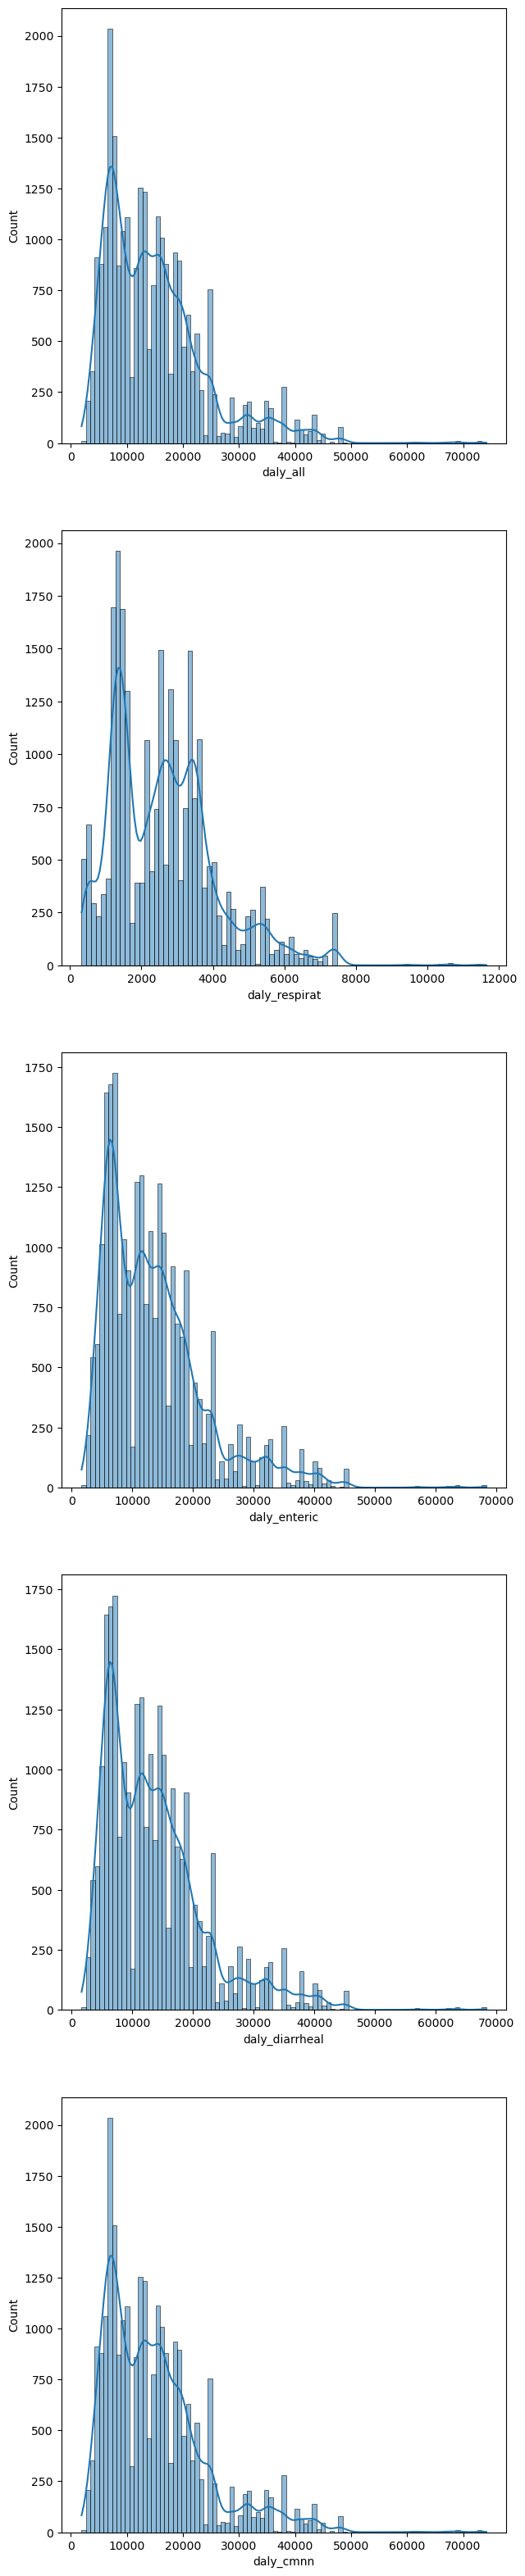

In [37]:
plot =figure, axes = plt.subplots(5,1,figsize=(7,40))
sns.histplot(data_final['daly_all'],kde = True,ax=axes[0])
sns.histplot(data_final['daly_respirat'],kde = True,ax=axes[1])
sns.histplot(data_final['daly_enteric'],kde = True,ax=axes[2])
sns.histplot(data_final['daly_diarrheal'],kde = True,ax=axes[3])
sns.histplot(data_final['daly_cmnn'],kde = True,ax=axes[4])

plt.savefig('daly1c.png')

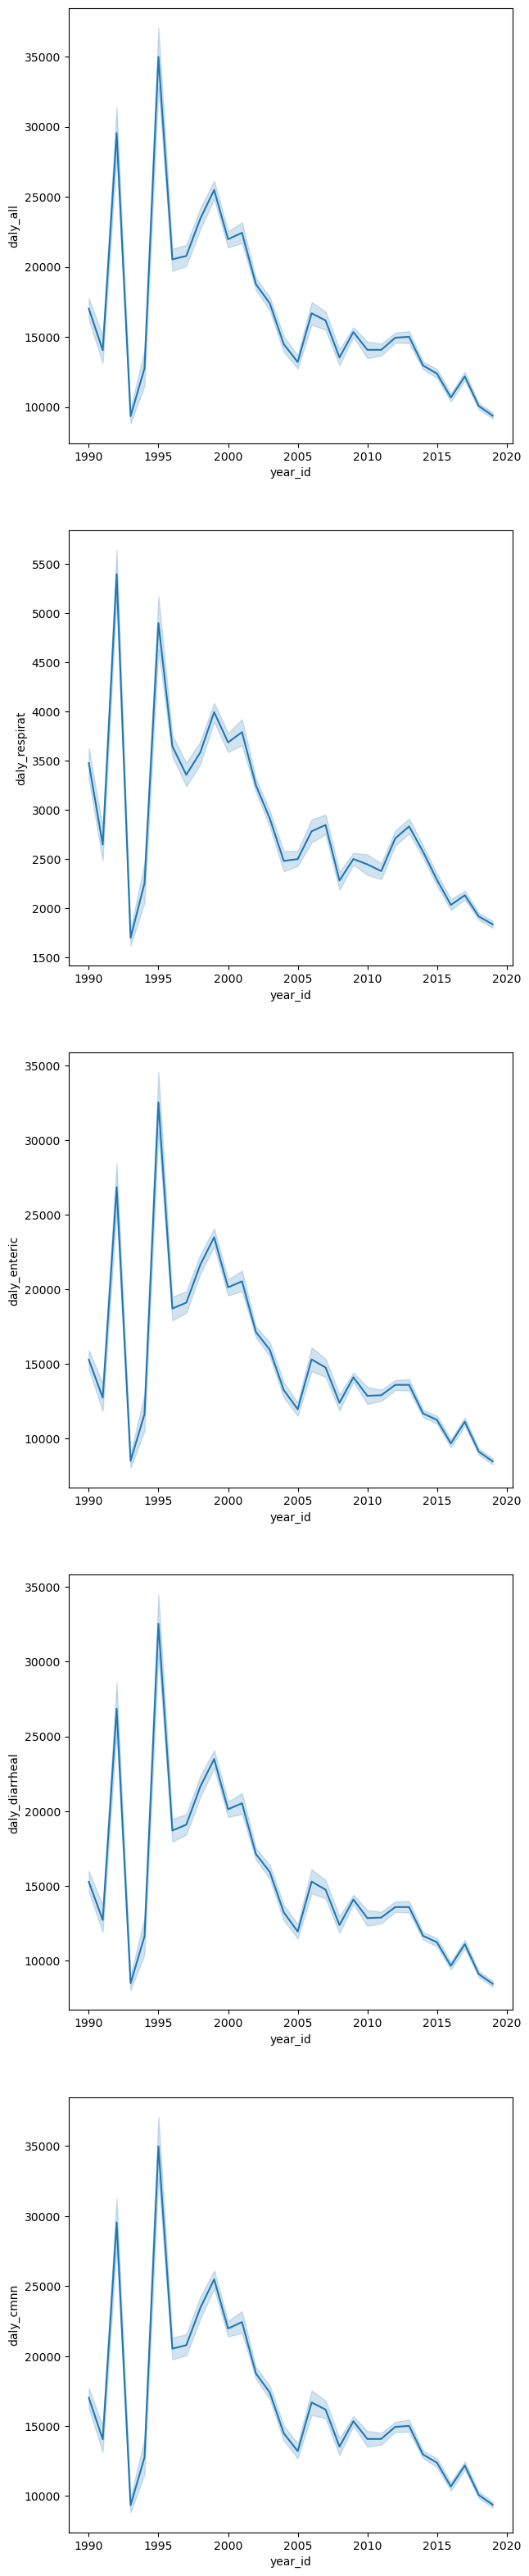

In [38]:

figure, axes = plt.subplots(5,1,figsize=(7,40))
sns.lineplot(x= 'year_id',y='daly_all',data=data_final,ax=axes[0])
sns.lineplot(x= 'year_id',y='daly_respirat',data=data_final,ax=axes[1])
sns.lineplot(x= 'year_id',y='daly_enteric',data=data_final,ax=axes[2])
sns.lineplot(x= 'year_id',y='daly_diarrheal',data=data_final,ax=axes[3])
sns.lineplot(x= 'year_id',y='daly_cmnn',data=data_final,ax=axes[4])

plt.savefig('daly2.png')

In [39]:
data_final.to_csv('data_final.csv')

## 5. Descriptive Analysis 

In [3]:
data_analysis = pd.read_csv('data_final.csv')

In [4]:
data_analysis

,Unnamed: 0,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,...,tot_affect,pg_id,gdis_count,gdis_nunique,gdis_count_lag,daly_all,daly_respirat,daly_enteric,daly_diarrheal,daly_cmnn
0,0,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,1007.0,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
1,1,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,1007.0,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
2,2,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,1007.0,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
3,3,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,1007.0,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
4,4,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,1007.0,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25733,25733,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,270186.0,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
25734,25734,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,270186.0,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
25735,25735,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,270186.0,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
25736,25736,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,270186.0,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0


In [ ]:
data_analysis = data_analysis.drop(columns={'Unnamed: 0'})

In [ ]:
print(data_analysis.dtypes)
print(data_analysis.columns)
print(data_analysis.describe(include='all'))

## sanity check to ensure the spread of the data is correct
print('sanity check 1, ensure appropriate years and countries are represented')
list_country=list(list(data_analysis['iso'].drop_duplicates()))
list_year=list(list(data_analysis['year_id'].drop_duplicates()))
print('country list', list_country)
print('year list', list_year)
#inspect for NAs
print('following checks for completeness of all columns')
print(data_analysis['iso'].isnull().values.any())
print(data_analysis['year_id'].isnull().values.any())
print(data_analysis['ihme_healthworkers_all_mean'].isnull().values.any())
print(data_analysis['best_log'].isnull().values.any())
print(data_analysis['daly_all'].isnull().values.any())
print(data_analysis['age0014_value'].isnull().values.any())
print(data_analysis['gdp_pcap_value'].isnull().values.any())
print(data_analysis['xpd_gdp_value'].isnull().values.any())
print(data_analysis['dah_total_log'].isnull().values.any())
print(data_analysis['access_drinkwater_index'].isnull().values.any())
print(data_analysis['access_sani_index'].isnull().values.any())

In [ ]:
data_analysis.info()

5.1. dependent variable

In [ ]:
print(data_analysis['daly_all'].describe())
print(data_analysis['daly_all'].info())
#standard deviation should not be 0, that would mean it does not change over time

In [ ]:
def nullcounts(ser):
    return ser.isnull().sum()

def custom_describe(frame, func=[nullcounts, 'sum', 'mean', 'median', 'max'],
                    numeric_only=False, **kwargs):
    if numeric_only:
        frame = frame.select_dtypes(include=np.number)
    return frame.agg(func, **kwargs)

custom_describe(data_analysis['daly_all'])
data_analysis['daly_all'].describe()

In [ ]:
#time trend of the data
grouped = data_analysis.groupby(['iso', 'year_id']).agg({'daly_all': 'sum'})
top_donors = grouped.groupby('iso').agg({'daly_all': 'sum'}).nlargest(10, 'daly_all').index.tolist()
filtered = grouped[grouped.index.get_level_values('iso').isin(top_donors)]

# Pivot the data to create a column for each donor and a row for each year
pivoted = filtered.reset_index().pivot(index='year_id', columns='iso', values='daly_all')
pivoted.plot.area(stacked=True)

plt.title('Development of DALY in top 10 countries over time')
plt.xlabel('Year')
plt.ylabel('Rate of DALY')
plt.savefig('timetrend_daly.png')
# Show the plot
plt.show()

In [ ]:
#produce distribution plots
sns.histplot(data_analysis['daly_all'])
plt.title('Distribution of the DV – DALY attributable to unsafe acceess to WASH')
plt.savefig('daly_all_hist.png')

In [ ]:
#test for skweness
import scipy
#from scipy.stats import skewtest
#scipy.stats.skewtest(data_analysis['daly_all'], axis=0, nan_policy='omit', alternative='two-sided')

In [ ]:
#test for outliers
## see data_analysis.daly_all.describe() or the boxplots
### clear indication that there are outliers - now use statistical tests

In [ ]:
#test for missingness
values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

## generally 29% missingness, which is strange since it sshould be complete, its estimates

In [ ]:
#time trend of the data
sns.lineplot(x='year_id',y='daly_all',data=data_analysis)
plt.title('Timetrend of the DV – DALY sttributable to unsafe acceess to WASH')
plt.savefig('daly_all_timetrend.png')

In [ ]:
#judging from the descriptive analysis, need there be any transformations?
##no

5.2. independent variable

5.2.1. binary conflict variable

In [ ]:
data_analysis['dummy_conflict'].describe()

In [ ]:
data_analysis['dummy_conflict_hightreshold'].describe()

In [ ]:
#produce distribution plots
sns.histplot(data_analysis['dummy_conflict'],kde = True)
plt.title('Distribution of binary conflict predictor')
plt.savefig('dummy_conflict_hist.png')

In [ ]:
#produce distribution plots
sns.histplot(data_analysis['dummy_conflict'],kde = True)
plt.title('Distribution of binary conflict predictor with high treshold')
plt.savefig('dummy_conflict_hist_hightreshoold.png')

5.2.2. conflict fatalities

In [ ]:
data_analysis['best_log'].describe()

In [ ]:
#produce distribution plots
sns.histplot(data_analysis['best_log'],kde = True)
plt.title('Distribution of log-transformed conflict predictor')
plt.savefig('best_hist.png')

#what does the distribution say? --> log transform the variable

In [ ]:
#time trend of the data
grouped = data_analysis.groupby(['iso', 'year_id']).agg({'best_log': 'sum'})
top_donors = grouped.groupby('iso').agg({'best_log': 'sum'}).nlargest(10, 'best_log').index.tolist()
filtered = grouped[grouped.index.get_level_values('iso').isin(top_donors)]

# Pivot the data to create a column for each donor and a row for each year
pivoted = filtered.reset_index().pivot(index='year_id', columns='iso', values='best_log')
pivoted.plot.area(stacked=True)

plt.title('Development of conflict fatalities in top 10 countries over time')
plt.xlabel('Year')
plt.ylabel('Conflict fatalities logp1')
plt.savefig('timetrend_conflict.png')

# Show the plot
plt.show()

In [ ]:
##inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)

In [ ]:

sns.lineplot(x='year_id' ,y='dummy_conflict',data=data_analysis)
plt.title('Trendline of binary conflict predictor')
plt.savefig('conflict_trend.png')

In [ ]:

sns.lineplot(x='year_id' ,y='dummy_conflict_hightreshold',data=data_analysis)
plt.title('Trendline of binary conflict predictor with high treshold')
plt.savefig('conflict_trend_hightreshold.png')

In [ ]:

sns.lineplot(x='year_id' ,y='best_log',data=data_analysis)
plt.title('Trendline of log-tansformed conflict predictor')
plt.savefig('conflict_trend_log.png')

In [ ]:
#compare logtransformed with non logtransfomed variables

sns.histplot(data_analysis['best_log'],kde=True)

plt.savefig('conflict_log.png')

In [ ]:
#inspect the conflict lags
figure, axes = plt.subplots(3,1,figsize=(10,55))
sns.histplot(data_analysis['lag_best_5'],ax=axes[0])
sns.histplot(data_analysis['lag_best_10'],ax=axes[1])
sns.histplot(data_analysis['lag_best_20'],ax=axes[1])

plt.savefig('conflict_lag.png')

5.2.3. dummy type of conflict

In [ ]:
data_analysis[['dummy_sb','dummy_os','dummy_ns']].describe()

In [ ]:
sns.histplot(data_analysis['dummy_os'],kde=True)
plt.title('Distribution of one-sided violence')
plt.savefig('conflictos.png')

In [ ]:
sns.histplot(data_analysis['dummy_sb'],kde=True)
plt.title('Distribution of state-based violence')
plt.savefig('conflict_sb.png')

In [ ]:
#inspect the conflict lags
sns.histplot(data_analysis['dummy_ns'],kde=True)
plt.title('Distribution of non-state violence')
plt.savefig('conflict_ns.png')

5.2.4. dummy neighboring country in conflict

In [ ]:
data_analysis['dummy_neighbor'].describe()

In [ ]:
data_analysis['dummy_neighbor_hightreshold'].describe()

In [ ]:
sns.histplot(data_analysis['dummy_neighbor'],kde=True)
plt.title('Distribution of variable indicating neighboring conflict')
plt.savefig('conflict_neighbor.png')

In [ ]:
sns.histplot(data_analysis['dummy_neighbor_hightreshold'],kde=True)
plt.title('Distribution of variable indicating neighboring conflict with high treshold')
plt.savefig('conflict_neighbor_hightreshold.png')

5.3. controls package standard

In [ ]:
#get descriptives
print(data_analysis['gdp_log'].describe())
print(data_analysis['age0014_value'].describe())
print(data_analysis['xpd_gdp_value'].describe())
# all variables vary over time, the std is not zero

In [ ]:
sns.histplot(data_analysis['gdp_log'],kde=True)
plt.title('Distribution of GDP, log-transformed')
plt.savefig('gdp_hist.png')

In [ ]:
sns.histplot(data_analysis['age0014_value'],kde=True)
plt.title('Distribution of population % aged between 0 and 14 years')
plt.savefig('age0014_hist.png')

In [ ]:
#produce distribution plot
sns.histplot(data_analysis['xpd_gdp_value'],kde=True)
plt.title('Distribution of government expenditure as % of GDP')
plt.savefig('gov_expense_hist.png')

#gdp has already been logtransformed

In [ ]:
#inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

In [ ]:
data_analysis.to_csv('data_analysis.csv')

5.4. controls package health

In [ ]:
#get descriptives
display(data_analysis['ihme_healthworkers_all_mean'].describe())
display(data_analysis['dah_total_log'].describe())
#all varables vary over time, the std is not 0

In [ ]:
#produce distribution plots
sns.histplot(data_analysis['dah_total_log'],kde = True)
plt.title('Distribution of development aid attributed to health')
plt.savefig('dah_hist.png')
##dah has already been log transformed

In [18]:
data_analysis['healthworker_all_log'] = np.log(data_analysis['ihme_healthworkers_all_mean'])
display(data_analysis)

,Unnamed: 0,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,...,gdis_count,gdis_nunique,gdis_count_lag,daly_all,daly_respirat,daly_enteric,daly_diarrheal,daly_cmnn,death_tot_log,healthworker_all_log
0,0,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,0.000000,3.390238
1,1,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,0.000000,3.390238
2,2,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,0.000000,3.390238
3,3,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,0.000000,3.390238
4,4,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,0.000000,3.390238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25733,25733,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0,6.484635,3.872783
25734,25734,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0,6.484635,3.872783
25735,25735,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0,6.484635,3.872783
25736,25736,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0,6.484635,3.872783


In [ ]:
#logtransform the health worker density
import seaborn as sns
data_analysis['healthworker_all_log'] = np.log(data_analysis['ihme_healthworkers_all_mean'])
display(data_analysis)

figure, axes = plt.subplots(2,1,figsize=(10,55))
sns.histplot(data_analysis['ihme_healthworkers_all_mean'],ax=axes[0])
sns.histplot(data_analysis['healthworker_all_log'],ax=axes[1])

plt.savefig('healthworker_log.png')

In [ ]:
#produce distribution plot
sns.histplot(data_analysis['healthworker_all_log'],kde = True)
plt.title('Distribution of health worker density')
plt.savefig('healthworker_hist.png')
##dah has already been log transformed

In [ ]:
#inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

5.5 controls package disaster

In [ ]:
#get descriptives
display(data_analysis['access_drinkwater_index'].describe())
display(data_analysis['access_sani_index'].describe())
display(data_analysis['death_tot'].describe())
display(data_analysis['gdis_count_lag'].describe())

In [ ]:
sns.histplot(data_analysis['access_drinkwater_index'],kde = True)
plt.title('Distribution of population with access to safe drinkwater')
plt.savefig('water_index_hist.png')

In [ ]:
sns.histplot(data_analysis['access_sani_index'],kde = True)
plt.title('Distribution of population with access to sanitation')
plt.savefig('sani_index_hist.png')

In [5]:
#logtransform the wdi_gdp variable
data_analysis['death_tot_log'] = np.log1p(data_analysis['death_tot'])
data_analysis

,Unnamed: 0,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,...,pg_id,gdis_count,gdis_nunique,gdis_count_lag,daly_all,daly_respirat,daly_enteric,daly_diarrheal,daly_cmnn,death_tot_log
0,0,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,0.000000
1,1,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,0.000000
2,2,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,0.000000
3,3,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,0.000000
4,4,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25733,25733,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0,6.484635
25734,25734,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0,6.484635
25735,25735,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0,6.484635
25736,25736,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0,6.484635


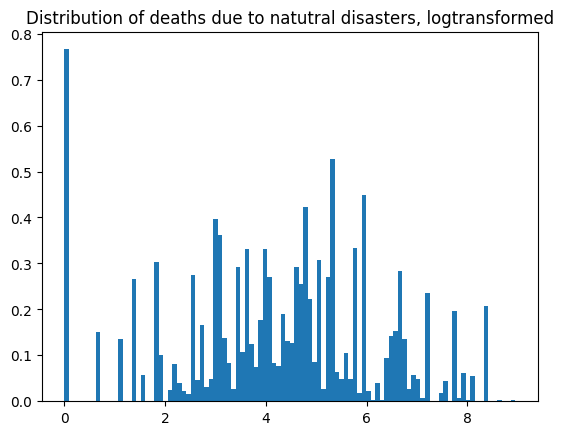

In [13]:
plt.hist(data_analysis['death_tot_log'], bins=100, density= True)
plt.title('Distribution of deaths due to natutral disasters, logtransformed')
plt.savefig('death_emdat_hist.png')

In [ ]:
#produce distribution plots
sns.histplot(data_analysis['gdis_count_lag'],kde = True)
plt.title('Distribution of disaster event counts, log-transformed')
plt.savefig('disaster_event_hist.png')

In [ ]:
#inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

In [ ]:
data_analysis['access_sani_index'].describe()

## 6. Statistical Analysis – Fixed Effects model

In [ ]:
import statsmodels

In [ ]:
## simple regression plot with line of best fit between two variables
plot3 = sns.regplot(x='best_log',y='daly_all',data= data_analysis,scatter=False,fit_reg=True)

In [ ]:
## simple regression plot with line of best fit between two variables
plot2 = sns.regplot(x='dummy_conflict',y='daly_all',data= data_analysis,scatter=False,fit_reg=True)

In [ ]:
## simple regression scatterplot between two variables
plot4 = sns.regplot(x='best_log',y='daly_all',data= data_analysis,scatter=True,fit_reg=False)

In [ ]:
## simple regression scatterplot between two variables
plot4 = sns.regplot(x='dummy_conflict_hightreshold',y='daly_all',data= data_analysis,scatter=True,fit_reg=False)

In [ ]:
#plot of daly_all across all countries and years against the number of fatalities
 
sns.scatterplot(x=data_analysis['daly_all'], 
                y=data_analysis['best_log']).set(title='Y-o-Y % Change in daly versus Y-o-Y % Change in fatalities')

In [14]:
data = data_analysis.copy()

In [ ]:
data.columns

In [ ]:
#define datasets with the different types of conflict
data_sb = data.loc[data['type_of_violence'] == 'sb']
display(data_sb)

data_ns = data.loc[data['type_of_violence'] == 'ns']
display(data_ns)

data_os = data.loc[data['type_of_violence'] == 'os']
display(data_os)

6.1. base model using the binary conflict indicator

In [ ]:
import scipy.stats

In [ ]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict','dummy_neighbor']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
dummy_all = mod.fit(cov_type='clustered', cluster_entity=True)
#with open('results_dummy_all.txt', 'w') as f:
 #   f.write(dummy_all.summary.as_text())
#print(dummy_all)

6.1.1. Base model with binary predictor and different types of conflict

In [ ]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data_sb.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict','dummy_neighbor']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
dummy_sb = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_sb.txt', 'w') as f:
    f.write(dummy_sb.summary.as_text())
print(dummy_sb)

In [ ]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data_os.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict','dummy_neighbor']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
dummy_os = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_os.txt', 'w') as f:
    f.write(dummy_os.summary.as_text())
print(dummy_os)

In [ ]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data_ns.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict','dummy_neighbor']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
dummy_ns = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummyns.txt', 'w') as f:
    f.write(dummy_ns.summary.as_text())
print(dummy_ns)

6.2. model with conflict history

In [ ]:
#the country fixed effects model LAGS
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','lag_best_5','lag_best_10','lag_best_20']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
fat = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_conflict_history.txt', 'w') as f:
    f.write(fat.summary.as_text())
print(fat)

6.2.1. try for different types of violence

In [ ]:
#the country fixed effects model LAGS
from linearmodels.panel import PanelOLS
data1 = data_sb.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','lag_best_5', 'lag_best_10','lag_best_20']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
fat_sb = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_conflict_history_sb.txt', 'w') as f:
    f.write(fat_sb.summary.as_text())
print(fat_sb)

In [ ]:
#the country fixed effects model LAGS
from linearmodels.panel import PanelOLS
data1 = data_os.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','lag_best_5', 'lag_best_10','lag_best_20']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
fat_os = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_conflict_history_os.txt', 'w') as f:
    f.write(fat_os.summary.as_text())
print(fat_os)

In [ ]:
#the country fixed effects model LAGS
from linearmodels.panel import PanelOLS
data1 = data_ns.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','lag_best_5', 'lag_best_10','lag_best_20']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
fat_ns = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_conflict_history_ns.txt', 'w') as f:
    f.write(fat_os.summary.as_text())
print(fat_ns)

6.3. Standard specification model

In [ ]:
#the country fixed effects model STANDARD
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','lag_best_5', 'lag_best_10','lag_best_20','gdp_log', 'age0014_value','xpd_gdp_value',]]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
standard_spec = mod.fit(cov_type='clustered', cluster_entity=True)
with open('resuts_standard.txt', 'w') as f:
    f.write(standard_spec.summary.as_text())
print(standard_spec)

In [ ]:
#the country fixed effects model STANDARD WITHOUT XPD
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','lag_best_5', 'lag_best_10','lag_best_20','gdp_log', 'age0014_value']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
standard_spec = mod.fit(cov_type='clustered', cluster_entity=True)
with open('resuts_standard.txt', 'w') as f:
    f.write(standard_spec.summary.as_text())
print(standard_spec)

6.4. Health specification model

In [ ]:
#the country fixed effects model HEALTH
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','lag_best_5', 'lag_best_10','lag_best_20','dah_total_log','healthworker_all_log']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
health_spec = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_health_specification.txt', 'w') as f:
    f.write(health_spec.summary.as_text())
print(health_spec)

6.5. Disaster specification model

In [16]:
#the country fixed effects model DISASTER
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','lag_best_5', 'lag_best_10','lag_best_20','access_drinkwater_index', 'access_sani_index', 'death_tot_log','gdis_count_lag']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
disaster_spec = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_disaster_specification.txt', 'w') as f:
    f.write(disaster_spec.summary.as_text())
print(disaster_spec)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.5625
Estimator:                   PanelOLS   R-squared (Between):             -4.0831
No. Observations:               22128   R-squared (Within):               0.5625
Date:                Sat, May 20 2023   R-squared (Overall):             -6.2960
Time:                        14:58:43   Log-likelihood                -2.113e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      5681.9
Entities:                          31   P-value                           0.0000
Avg Obs:                       713.81   Distribution:                 F(5,22092)
Min Obs:                       1.0000                                           
Max Obs:                       4569.0   F-statistic (robust):             109.59
                            

/Users/NatStrom/opt/miniconda3/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


6.7. model including all specifications but overfitting

In [22]:
data = data_analysis.copy()

In [24]:
#the country fixed effects model ALL
from linearmodels.panel import PanelOLS
data2 = data.set_index(['iso','year_id'])
y= data2['daly_all']
x= data2[['best_log','lag_best_5', 'lag_best_10','lag_best_20','gdp_log', 'age0014_value','xpd_gdp_value','dah_total_log','healthworker_all_log','access_drinkwater_index', 'access_sani_index', 'death_tot_log','gdis_count_lag']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
model_overfit = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_all.txt', 'w') as f:
    f.write(model_overfit.summary.as_text())
print(model_overfit)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.8217
Estimator:                   PanelOLS   R-squared (Between):             -46.382
No. Observations:               19890   R-squared (Within):               0.8217
Date:                Sat, May 20 2023   R-squared (Overall):             -61.492
Time:                        15:01:12   Log-likelihood                -1.807e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      7037.3
Entities:                          24   P-value                           0.0000
Avg Obs:                       828.75   Distribution:                F(13,19853)
Min Obs:                       8.0000                                           
Max Obs:                       4038.0   F-statistic (robust):             2745.5
                            

/Users/NatStrom/opt/miniconda3/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


6.8. base model with high conflict treshold

In [ ]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict_hightreshold','dummy_neighbor_hightreshold']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_all_hightresh.txt', 'w') as f:
    f.write(res.summary.as_text())
print(res)


6.8.1. base model with hightreshold for different conflict types

In [ ]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data_sb.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict_hightreshold','dummy_neighbor_hightreshold']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
dummy_sb_high = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_sb_hightresh.txt', 'w') as f:
    f.write(dummy_sb_high.summary.as_text())
print(dummy_sb_high)


In [ ]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data_ns.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict_hightreshold','dummy_neighbor_hightreshold']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
dummy_ns_high = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_ns_hightresh.txt', 'w') as f:
    f.write(dummy_ns_high.summary.as_text())
print(dummy_ns_high)


In [ ]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data_os.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict_hightreshold','dummy_neighbor_hightreshold']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
dummy_os_high = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_os_hightresh.txt', 'w') as f:
    f.write(dummy_os_high.summary.as_text())
print(dummy_os_high)


In [ ]:
data_analysis.to_csv('data_analysis.csv')

## 7. Statistical Analysis – influential cases and outliers

In [ ]:
from scipy import signal

In [ ]:
def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [ ]:

# Convert the 'Entity' and 'Time' columns to categorical variables
#data_analysis['Entity'] = pd.Categorical(data_analysis['iso'])


# Estimate the fixed effects model using PanelOLS
y= data1['daly_all']
x= data1[['best_log']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
results = mod.fit(cov_type='clustered', cluster_entity=True)
# Calculate the residuals manually
y = data_analysis['daly_all']
X = data_analysis[['best_log']]
residuals = y - X @ results.params

# Calculate the standardized residuals
mean_residuals = residuals.mean()
std_residuals = residuals.std()
std_residuals = (residuals - mean_residuals) / std_residuals

# Identify influential observations based on standardized residuals
influential_obs = std_residuals.abs() > 2

# Print influential observations
if influential_obs.any():
    print("Influential observations:")
    for i, obs in enumerate(influential_obs):
        if obs:
            print(f"Observation {i + 1}")
else:
    print("No influential observations found.")

In [ ]:
results

In [ ]:

# Convert the 'Entity' and 'Time' columns to categorical variables
#data_analysis['Entity'] = pd.Categorical(data_analysis['iso'])


# Estimate the fixed effects model using PanelOLS
y= data1['daly_all']
x= data1[['best_log','lag_best_5', 'lag_best_10','lag_best_20']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
results = mod.fit(cov_type='clustered', cluster_entity=True)
# Calculate the residuals manually
y = data_analysis['daly_all']
X = data_analysis[['best_log','lag_best_5', 'lag_best_10','lag_best_20']]
residuals = y - X @ results.params

# Calculate the standardized residuals
mean_residuals = residuals.mean()
std_residuals = residuals.std()
std_residuals = (residuals - mean_residuals) / std_residuals

# Identify influential observations based on standardized residuals
influential_obs = std_residuals.abs() > 2

# Print influential observations
if influential_obs.any():
    print("Influential observations:")
    for i, obs in enumerate(influential_obs):
        if obs:
            print(f"Observation {i + 1}")
else:
    print("No influential observations found.")

In [ ]:
results

In [ ]:

# Convert the 'Entity' and 'Time' columns to categorical variables
#data_analysis['Entity'] = pd.Categorical(data_analysis['iso'])


# Estimate the fixed effects model using PanelOLS
y= data1['daly_all']
x= data1[['best_log','gdp_log', 'age0014_value','xpd_gdp_value',]]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
results = mod.fit(cov_type='clustered', cluster_entity=True)
# Calculate the residuals manually
y = data_analysis['daly_all']
X = data_analysis[['best_log','gdp_log', 'age0014_value','xpd_gdp_value',]]
residuals = y - X @ results.params

# Calculate the standardized residuals
mean_residuals = residuals.mean()
std_residuals = residuals.std()
std_residuals = (residuals - mean_residuals) / std_residuals

# Identify influential observations based on standardized residuals
influential_obs = std_residuals.abs() > 2

# Print influential observations
if influential_obs.any():
    print("Influential observations:")
    for i, obs in enumerate(influential_obs):
        if obs:
            print(f"Observation {i + 1}")
else:
    print("No influential observations found.")

In [ ]:
results

In [ ]:

# Convert the 'Entity' and 'Time' columns to categorical variables
#data_analysis['Entity'] = pd.Categorical(data_analysis['iso'])

# Estimate the fixed effects model using PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','dah_total_log','healthworker_all_log']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
results = mod.fit(cov_type='clustered', cluster_entity=True)
# Calculate the residuals manually
y = data_analysis['daly_all']
X = data_analysis[['best_log','dah_total_log','healthworker_all_log']]
residuals = y - X @ results.params

# Calculate the standardized residuals
mean_residuals = residuals.mean()
std_residuals = residuals.std()
std_residuals = (residuals - mean_residuals) / std_residuals

# Identify influential observations based on standardized residuals
influential_obs = std_residuals.abs() > 2

# Print influential observations
if influential_obs.any():
    print("Influential observations:")
    for i, obs in enumerate(influential_obs):
        if obs:
            print(f"Observation {i + 1}")
else:
    print("No influential observations found.")

In [ ]:
results

In [26]:

# Convert the 'Entity' and 'Time' columns to categorical variables
#data_analysis['Entity'] = pd.Categorical(data_analysis['iso'])


# Estimate the fixed effects model using PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','access_drinkwater_index', 'access_sani_index', 'death_tot_log','gdis_count_lag']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
results = mod.fit(cov_type='clustered', cluster_entity=True)
# Calculate the residuals manually
y = data_analysis['daly_all']
X = data_analysis[['best_log','access_drinkwater_index', 'access_sani_index', 'death_tot_log','gdis_count_lag']]
residuals = y - X @ results.params

# Calculate the standardized residuals
mean_residuals = residuals.mean()
std_residuals = residuals.std()
std_residuals = (residuals - mean_residuals) / std_residuals

# Identify influential observations based on standardized residuals
influential_obs = std_residuals.abs() > 2

# Print influential observations
if influential_obs.any():
    print("Influential observations:")
    for i, obs in enumerate(influential_obs):
        if obs:
            print(f"Observation {i + 1}")
else:
    print("No influential observations found.")
    


Influential observations:
Observation 3343
Observation 3344
Observation 3345
Observation 3346
Observation 3347
Observation 8681
Observation 8682
Observation 8684
Observation 8685
Observation 8686
Observation 8688
Observation 8689
Observation 25672
Observation 25673
Observation 25675
Observation 25677
Observation 25679
Observation 25680
Observation 25681
Observation 25682
Observation 25683
Observation 25684
Observation 25685
Observation 25686
Observation 25687
Observation 25688
Observation 25689
Observation 25690
Observation 25691
Observation 25692
Observation 25693
Observation 25694
Observation 25695
Observation 25696
Observation 25697
Observation 25698
Observation 25699
Observation 25700
Observation 25701
Observation 25702
Observation 25703
Observation 25704
Observation 25705
Observation 25706
Observation 25707
Observation 25708
Observation 25709
Observation 25710
Observation 25711
Observation 25712
Observation 25713
Observation 25714
Observation 25715
Observation 25716
Observation 25

/Users/NatStrom/opt/miniconda3/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [27]:
results

Dep. Variable:,daly_all,R-squared:,0.5625
Estimator:,PanelOLS,R-squared (Between):,-4.0831
No. Observations:,22128,R-squared (Within):,0.5625
Date:,"Sat, May 20 2023",R-squared (Overall):,-6.2960
Time:,15:01:44,Log-likelihood,-2.113e+05
Cov. Estimator:,Clustered,,
,,F-statistic:,5681.9
Entities:,31,P-value,0.0000
Avg Obs:,713.81,Distribution:,"F(5,22092)"
Min Obs:,1.0000,,
Max Obs:,4569.0,F-statistic (robust):,109.59


In [ ]:
# Exclude influential observations from the data
data_filtered = data_analysis[~influential_obs]

In [ ]:
# Estimate the fixed effects model with filtered data
data_filtered = data_filtered.set_index(['iso','year_id'])
y_filtered = data_filtered['daly_all']
X_filtered = data_filtered[['best_log','lag_best_5', 'lag_best_10','lag_best_20']]
mod_filtered = PanelOLS(y_filtered, X_filtered, entity_effects=True, time_effects=False)
results_filtered = mod_filtered.fit(cov_type='clustered', cluster_entity=True)

# Print the summary of the filtered model
print(results_filtered)

## 8. Statistical Analysis – test for multicollinearity

In [ ]:
 'age0014_value','xpd_gdp_value'

In [ ]:
#exclude missing values
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop rows with missing or infinite values
df_clean = data_analysis.dropna().replace([np.inf, -np.inf], np.nan).dropna()

# Extract the control variables into a separate DataFrame
control_vars = df_clean[['dah_total_log','healthworker_all_log']]

# Calculate the VIF for each control variable
vif = pd.DataFrame()
vif["Variable"] = control_vars.columns
vif["VIF"] = [variance_inflation_factor(control_vars.values, i) for i in range(control_vars.shape[1])]

# Display the VIF results
print(vif)

In [ ]:
#exclude missing values
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop rows with missing or infinite values
df_clean = data_analysis.dropna().replace([np.inf, -np.inf], np.nan).dropna()

# Extract the control variables into a separate DataFrame
control_vars = df_clean[['gdp_log','age0014_value','xpd_gdp_value']]

# Calculate the VIF for each control variable
vif = pd.DataFrame()
vif["Variable"] = control_vars.columns
vif["VIF"] = [variance_inflation_factor(control_vars.values, i) for i in range(control_vars.shape[1])]

# Display the VIF results
print(vif)

In [ ]:
#exclude missing values
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop rows with missing or infinite values
df_clean = data_analysis.dropna().replace([np.inf, -np.inf], np.nan).dropna()

# Extract the control variables into a separate DataFrame
control_vars = df_clean[['access_drinkwater_index', 'access_sani_index', 'death_tot','gdis_count_lag']]

# Calculate the VIF for each control variable
vif = pd.DataFrame()
vif["Variable"] = control_vars.columns
vif["VIF"] = [variance_inflation_factor(control_vars.values, i) for i in range(control_vars.shape[1])]

# Display the VIF results
print(vif)

## convert to PDF

In [2]:
import nbconvert

In [4]:
?nbconvert

Type:        module
String form: <module 'nbconvert' from '/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/nbconvert/__init__.py'>
File:        ~/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/nbconvert/__init__.py
Docstring:   Utilities for converting notebooks to and from different formats.
